#### Exploratory Data Analysis
It is the process of analyzing and summarizing data to gain insights and understanding of underlying patterns and relationships,
EDA involves:
- Data cleaning,
- Data Visualization and
- Statistical analysis

In [1]:
!pip install missingno

In [2]:
#import libraries
import pandas as pd #Data preprocessing
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns #Data visualization
import missingno as msno # Missing data visualization
from collections import Counter #Counting 

In [3]:
#Load dataset
df=pd.read_csv(r"C:\Users\muham\Downloads\Dune Sales Data.csv")

#3 ways to handle copying file path issues
#1-add r at the front of the file path
#2-Double the Backward splashes across all the slashes and that works
#3-Change the backward slash to forward slash
#4-Keep the file in the same folder as the jupyter notebook so  don't need a long path.

In [4]:
#Print the top rows
df.head()#Prints the top 5 rows

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0  19-Feb-16     High        Segun            29               F  Abia   
1  20-Feb-16     High        Segun            29               F  Abia   
2  27-Feb-16     High        Segun            29               F  Abia   
3  12-Mar-16     High        Segun            29               F  Abia   
4  12-Mar-16     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0      Accessories     Keyboard         Online       1.0      80.00   
1         Clothing  Polo shirts         Online       2.0      24.50   
2      Accessories     Keyboard         Online       3.0       3.67   
3      Accessories     Keyboard         Online       2.0      87.50   
4      Accessories     Keyboard         Online       3.0      35.00   

   Unit_Price  
0      109.00  
1       28.50  
2        5.00  
3      116.50  
4       41.67

In [5]:
#Print the bottom rows
df.tail()#Prints last 5 rows

Date Customer Sales Person  Customer_Age Customer_Gender   State  \
34862   7-Feb-16     High        Kenny            38               M  Ebonyi   
34863  13-Mar-15     High        Kenny            38               M  Ebonyi   
34864   5-Apr-15     High        Kenny            38               M  Ebonyi   
34865  30-Aug-15     High        Kenny            38               M  Ebonyi   
34866        NaN      NaN          NaN            38             NaN     NaN   

      Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
34862           Phones       IPhone         Online       2.0     1160.0   
34863           Phones       IPhone         Online       1.0     2049.0   
34864           Phones       IPhone         Online       3.0      683.0   
34865           Phones       IPhone         Online       1.0     2320.0   
34866              NaN          NaN            NaN       NaN        NaN   

       Unit_Price  
34862      985.50  
34863     1583.00  
34864      560.67  
34865     1568.00  
34866         NaN

In [6]:
#Dimensionality of the data-number of rows and columns
df.shape

(34867, 12)

In [7]:
#Examine the columns or features of the data-Feature engineering/analysis is referring to columns.
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [8]:
#Investigate the dataset for annomalies and data type
df.info()
#object reprsent categorical data while int and float represenrs numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [9]:
#Numerical Statistical analysis
df.describe()#Explores numerical columns

Customer_Age      Quantity     Unit_Cost    Unit_Price
count  34867.000000  34866.000000  34866.000000  34866.000000
mean      36.382683      2.002524    349.880567    389.232473
std       11.112813      0.813936    490.015846    525.319097
min       17.000000      1.000000      0.670000      0.670000
25%       28.000000      1.000000     45.000000     53.670000
50%       35.000000      2.000000    150.000000    179.000000
75%       44.000000      3.000000    455.000000    521.000000
max       87.000000      3.000000   3240.000000   5082.000000

In [10]:
#Categorical Statistical analysis
df.describe(include=['object','bool'])#Explores categorical columns

Date Customer Sales Person Customer_Gender  State  \
count      34866    34866        34866           34866  34866   
unique       576        4            7               2     36   
top     1-Mar-16      Low       Remota               F  Lagos   
freq         196    13041         6667           17439  10332   

       Product_Category Sub_Category Payment Option  
count             34866        34866          34866  
unique                3           17              3  
top         Accessories     Keyboard           Cash  
freq              22534        11112          15911

### Handling missing values

In [11]:
#Investigate the missing data
null_vals=df.isnull().sum()
null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

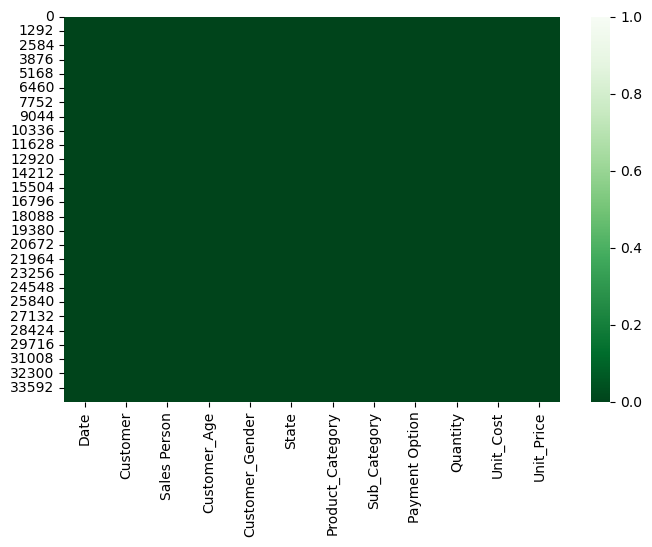

In [12]:
#Visualize the missing data
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(),cbar=True,cmap="Greens_r");

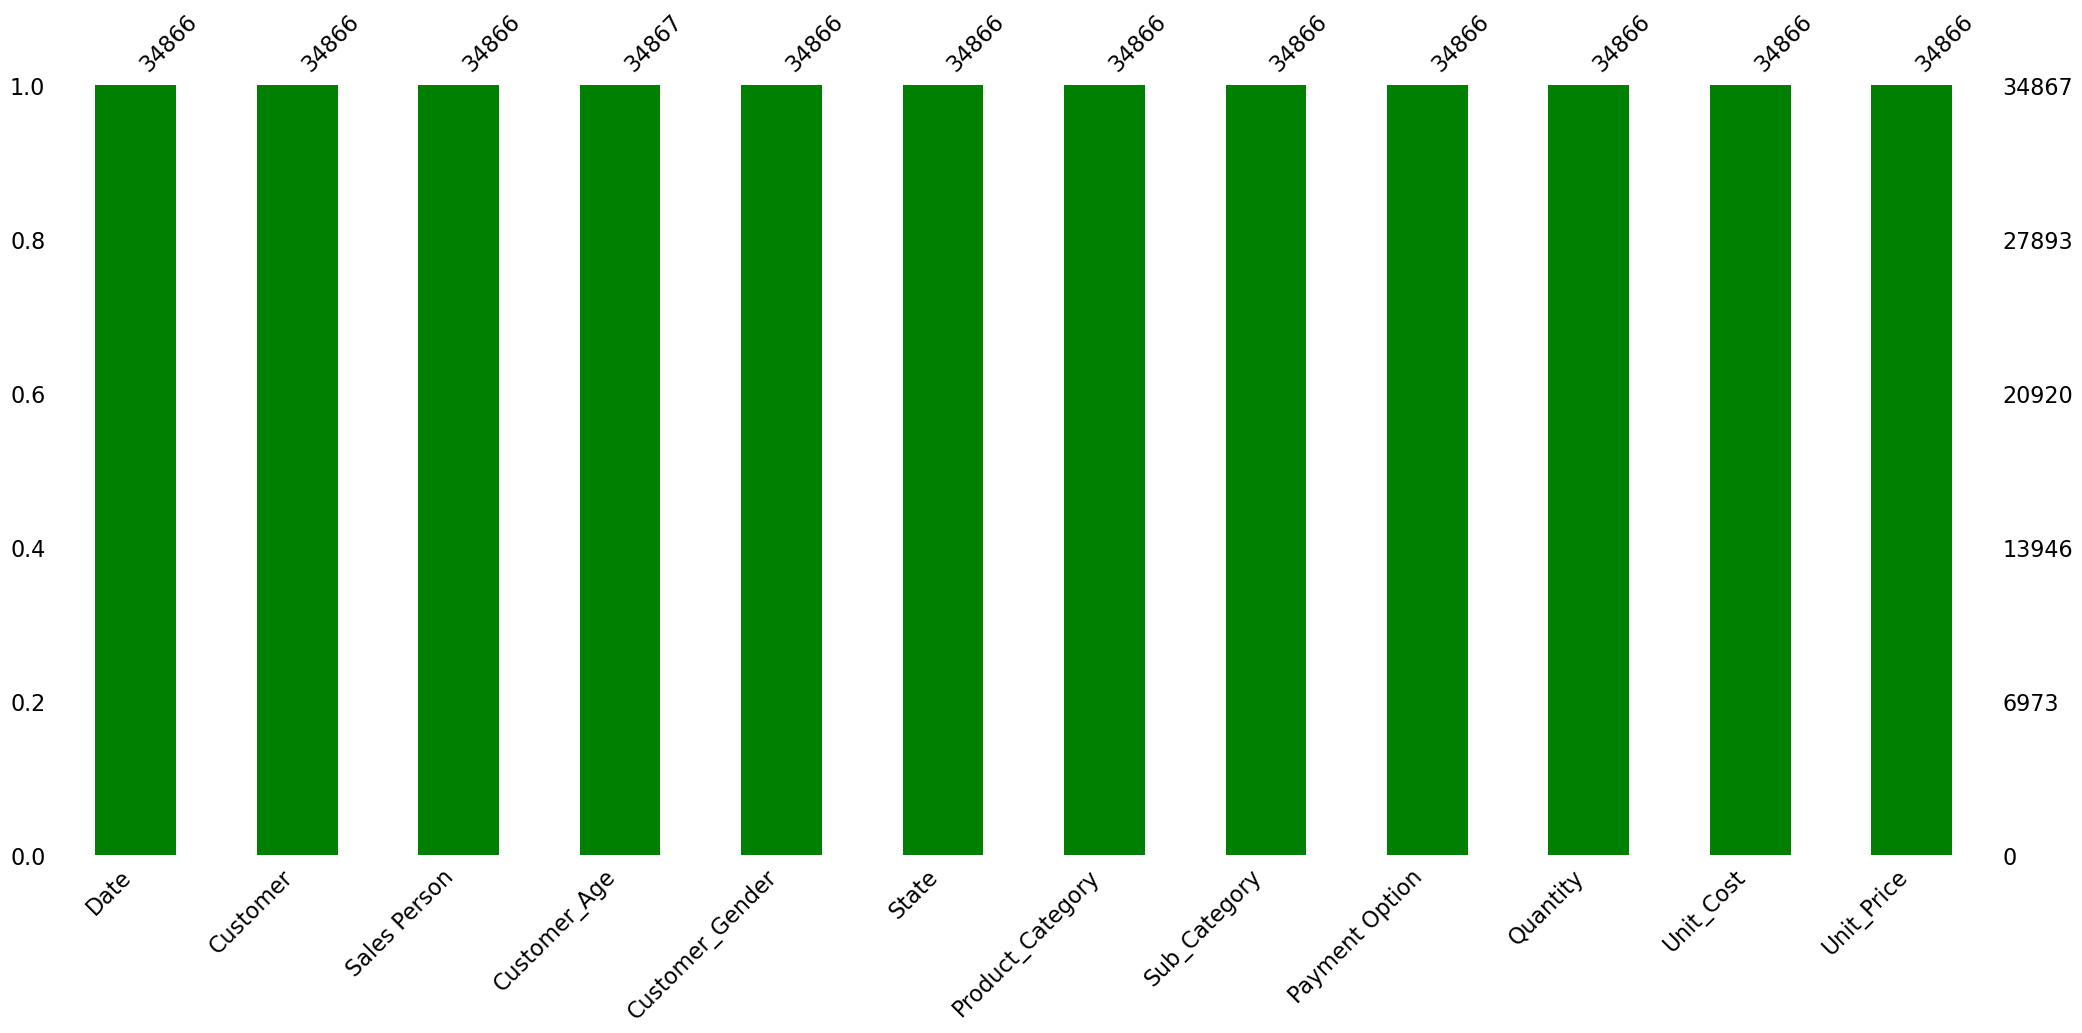

In [13]:
msno.bar(df,color='Green');

In [14]:
#Display where the missing data exists
df[df.isnull().any(axis=1)]

Date Customer Sales Person  Customer_Age Customer_Gender State  \
34866  NaN      NaN          NaN            38             NaN   NaN   

      Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
34866              NaN          NaN            NaN       NaN        NaN   

       Unit_Price  
34866         NaN

In [15]:
#Drop the missing data
df.dropna(inplace=True)#Inplace=true is very important for this to work

In [16]:
df.isnull().sum()#The missing data has been removed from the dataset so no missing values.

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [17]:
#Datetime Analysis
df.head(2)

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0  19-Feb-16     High        Segun            29               F  Abia   
1  20-Feb-16     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0      Accessories     Keyboard         Online       1.0       80.0   
1         Clothing  Polo shirts         Online       2.0       24.5   

   Unit_Price  
0       109.0  
1        28.5

In [18]:
#Convert the date column into a pandas datetime object
df['Date']=pd.to_datetime(df['Date'])
df.info()

#Extract the year,month and quarter
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['monthname']=df['Date'].dt.month_name()
df['quarter']=df['Date'].dt.quarter
#df['day']=df['Date'].dt.day_name() for day and day names
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 3.5+ MB


C:\Users\muham\AppData\Local\Temp\ipykernel_24928\3592195530.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


Date Customer Sales Person  Customer_Age Customer_Gender State  \
0 2016-02-19     High        Segun            29               F  Abia   
1 2016-02-20     High        Segun            29               F  Abia   
2 2016-02-27     High        Segun            29               F  Abia   
3 2016-03-12     High        Segun            29               F  Abia   
4 2016-03-12     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0      Accessories     Keyboard         Online       1.0      80.00   
1         Clothing  Polo shirts         Online       2.0      24.50   
2      Accessories     Keyboard         Online       3.0       3.67   
3      Accessories     Keyboard         Online       2.0      87.50   
4      Accessories     Keyboard         Online       3.0      35.00   

   Unit_Price  year  month monthname  quarter  
0      109.00  2016      2  February        1  
1       28.50  2016      2  February        1  
2        5.00  2016      2  February        1  
3      116.50  2016      3     March        1  
4       41.67  2016      3     March        1

In [19]:
#Group Customer age
def age_group(x):
    if x>=17 and x<=27:
        return "17-27 Young Adults"
    elif x>=28 and x<=38:
        return "28-38 Youths"
    elif x>=39 and x<=49:
        return "39-49 Adults"
    elif x>=50 and x<=60:
        return "50-60 Old"
    elif x>=61 and x<=71:
        return "61-71 Elderly"
    elif x>=71 and x<=81:
        return "71-81 Old"
    elif x>=71 and x<=81:
        return "81-91 Old and Aged"

#Apply function to the data
df['age_group']=df['Customer_Age'].apply(age_group)
df.head()

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0 2016-02-19     High        Segun            29               F  Abia   
1 2016-02-20     High        Segun            29               F  Abia   
2 2016-02-27     High        Segun            29               F  Abia   
3 2016-03-12     High        Segun            29               F  Abia   
4 2016-03-12     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0      Accessories     Keyboard         Online       1.0      80.00   
1         Clothing  Polo shirts         Online       2.0      24.50   
2      Accessories     Keyboard         Online       3.0       3.67   
3      Accessories     Keyboard         Online       2.0      87.50   
4      Accessories     Keyboard         Online       3.0      35.00   

   Unit_Price  year  month monthname  quarter     age_group  
0      109.00  2016      2  February        1  28-38 Youths  
1       28.50  2016      2  February        1  28-38 Youths  
2        5.00  2016      2  February        1  28-38 Youths  
3      116.50  2016      3     March        1  28-38 Youths  
4       41.67  2016      3     March        1  28-38 Youths

In [20]:
#Cost,Revenue and Profit calculation
df['Cost']=df['Quantity']*df['Unit_Cost']
df['Revenue']=df['Quantity']*df['Unit_Price']
df['Profit']=df['Revenue']-df['Cost']
df.head()

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0 2016-02-19     High        Segun            29               F  Abia   
1 2016-02-20     High        Segun            29               F  Abia   
2 2016-02-27     High        Segun            29               F  Abia   
3 2016-03-12     High        Segun            29               F  Abia   
4 2016-03-12     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0      Accessories     Keyboard         Online       1.0      80.00   
1         Clothing  Polo shirts         Online       2.0      24.50   
2      Accessories     Keyboard         Online       3.0       3.67   
3      Accessories     Keyboard         Online       2.0      87.50   
4      Accessories     Keyboard         Online       3.0      35.00   

   Unit_Price  year  month monthname  quarter     age_group    Cost  Revenue  \
0      109.00  2016      2  February        1  28-38 Youths   80.00   109.00   
1       28.50  2016      2  February        1  28-38 Youths   49.00    57.00   
2        5.00  2016      2  February        1  28-38 Youths   11.01    15.00   
3      116.50  2016      3     March        1  28-38 Youths  175.00   233.00   
4       41.67  2016      3     March        1  28-38 Youths  105.00   125.01   

   Profit  
0   29.00  
1    8.00  
2    3.99  
3   58.00  
4   20.01

In [21]:
#Profit and Loss grouping
def porl(x):
    if x>=0:
        return "Profit"
    else:
        return "Loss"

df['Profit_Label']=df['Profit'].apply(porl)
df.head()

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0 2016-02-19     High        Segun            29               F  Abia   
1 2016-02-20     High        Segun            29               F  Abia   
2 2016-02-27     High        Segun            29               F  Abia   
3 2016-03-12     High        Segun            29               F  Abia   
4 2016-03-12     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  ...  Unit_Price  \
0      Accessories     Keyboard         Online       1.0  ...      109.00   
1         Clothing  Polo shirts         Online       2.0  ...       28.50   
2      Accessories     Keyboard         Online       3.0  ...        5.00   
3      Accessories     Keyboard         Online       2.0  ...      116.50   
4      Accessories     Keyboard         Online       3.0  ...       41.67   

   year  month  monthname quarter     age_group    Cost  Revenue  Profit  \
0  2016      2   February       1  28-38 Youths   80.00   109.00   29.00   
1  2016      2   February       1  28-38 Youths   49.00    57.00    8.00   
2  2016      2   February       1  28-38 Youths   11.01    15.00    3.99   
3  2016      3      March       1  28-38 Youths  175.00   233.00   58.00   
4  2016      3      March       1  28-38 Youths  105.00   125.01   20.01   

   Profit_Label  
0        Profit  
1        Profit  
2        Profit  
3        Profit  
4        Profit  

[5 rows x 21 columns]

#### Univariate analysis:

Univariate involves analyzing the distribution and summary statistics of individual columns/variables/feature

Numerical Column/Feature=Numerical Visualization Techniques

Categorical Column/Feature=Categorical Visualization Techniques

### Categorical Data Visualization

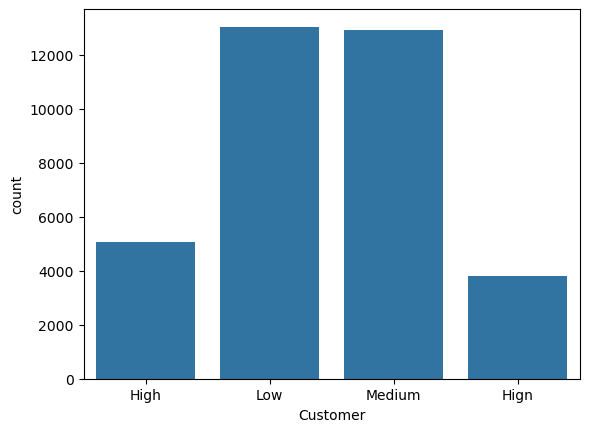

In [22]:
#How many customers belong to each customer spec
sns.countplot(x=df['Customer'],data=df);

In [23]:
#Investigate the columns affected
df[df['Customer']=='Hign'].head(3)
#It filters the DataFrame df to only include rows where the Customer column equals "Hign", then shows the first 3 rows of that filtered result.

Date Customer Sales Person  Customer_Age Customer_Gender  State  \
29770 2015-08-03     Hign       Derick            28               F  Lagos   
29771 2015-08-04     Hign       Derick            28               F  Lagos   
29772 2015-08-04     Hign       Derick            28               F  Lagos   

      Product_Category Sub_Category Payment Option  Quantity  ...  Unit_Price  \
29770           Phones       IPhone           Cash       1.0  ...     2136.00   
29771      Accessories     Keyboard           Cash       2.0  ...       19.50   
29772      Accessories     Keyboard           Cash       3.0  ...       18.67   

       year  month  monthname quarter     age_group     Cost  Revenue  Profit  \
29770  2015      8     August       3  28-38 Youths  2295.00  2136.00  -159.0   
29771  2015      8     August       3  28-38 Youths    35.00    39.00     4.0   
29772  2015      8     August       3  28-38 Youths    50.01    56.01     6.0   

       Profit_Label  
29770          Loss  
29771        Profit  
29772        Profit  

[3 rows x 21 columns]

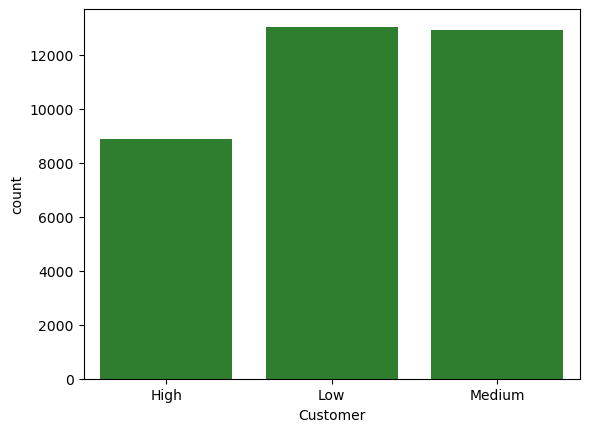

In [24]:
#Correct the spelling of HIGN
df.loc[df['Customer']=='Hign','Customer']='High'
sns.countplot(x=df['Customer'],data=df,color='forestgreen');
#df.loc[row_selector, column_selector]
#row_selector,the row labels(or conditions)
#Column selector,the column name

In [25]:
df['Customer'].value_counts()

Customer
Low       13041
Medium    12926
High       8899
Name: count, dtype: int64

#### My observation

The plot shows that most transactions come from low-value customers, while high-value customers contribute the least. The business should sustain low-value customers for steady revenue and nurture high-value customers for impactful growth.

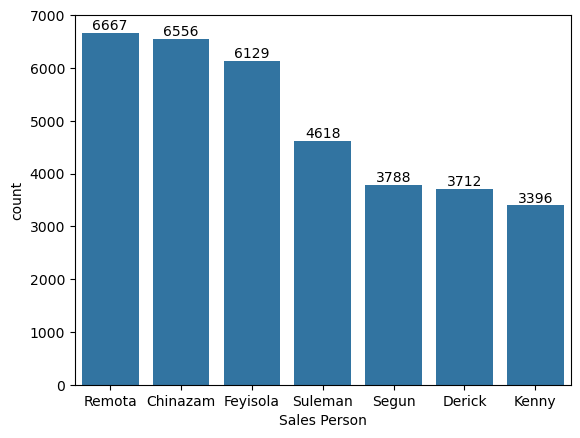

In [26]:
#Sales Person-How many transaction by Sales person
ax=sns.countplot(x=df['Sales Person'],order=df['Sales Person'].value_counts(ascending=False).index)#This line arranges in descending order.
value=df['Sales Person'].value_counts(ascending=False).values #This line gets the value of each index
ax.bar_label(container=ax.containers[0],labels=value);#This line adds labels to each bars

#### My Observation

The plot shows Kenny as the lowest performer, while Remota achieved nearly twice his sales. This highlights that the top three salespeople may be using effective strategies or approaches. If these can be identified and shared, it could help the rest of the team improve and raise overall sales performance

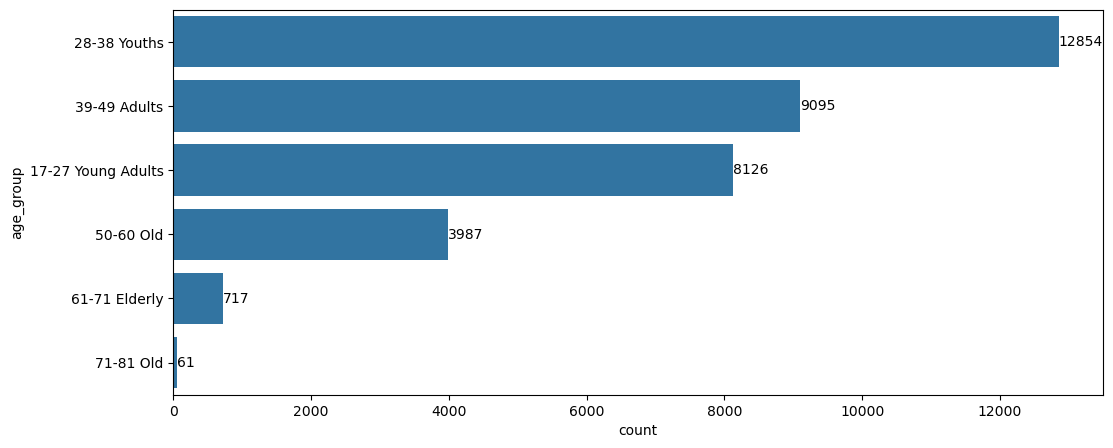

In [27]:
#Total Transactions by Customer Age group.
plt.figure(figsize=(12,5))
ax=sns.countplot(y=df['age_group'],order=df['age_group'].value_counts(ascending=False).index)#Change x to y to change from columnchart to barchart
value=df['age_group'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=value);

#### My Observation
Customers aged 28–38 generate the highest revenue, followed by those aged 39–48 and 18–27. We should analyze which products these groups buy most and explore offering them in bulk.

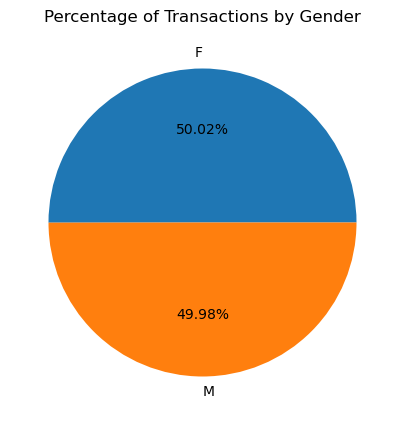

In [28]:
#Total transactions by Customer Gender
fig,ax=plt.subplots(figsize=(5,5))
count=Counter(df['Customer_Gender'])
ax.set_title('Percentage of Transactions by Gender')
ax.pie(count.values(),labels=count.keys(),autopct=lambda p:f'{p:.2f}%');

#### My Observation

Sales came from both gender almost equally

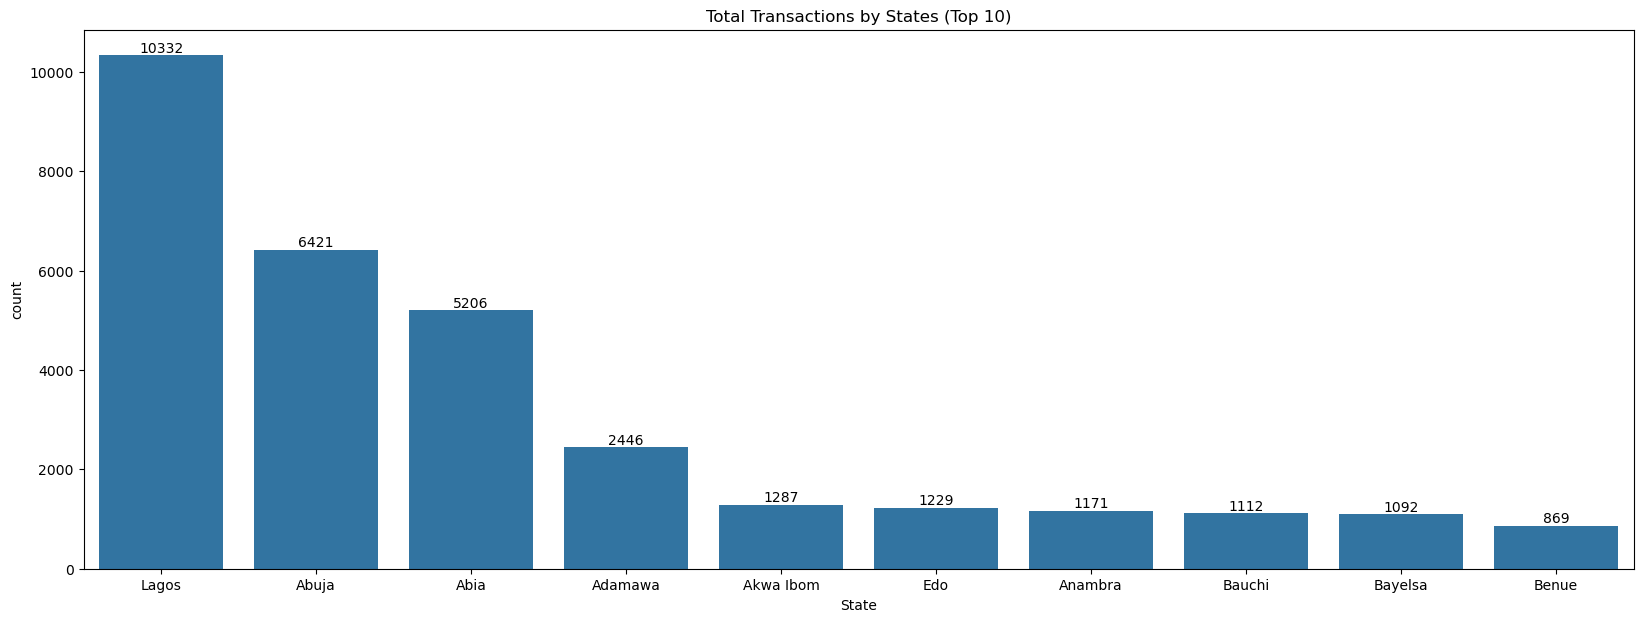

In [29]:
# Total Transaction by states
plt.figure(figsize=(20,7))
topten = df['State'].value_counts().head(10)

# assign the plot to ax
ax = sns.countplot(x="State", data=df, order=topten.index)

# get the values
value = df['State'].value_counts(ascending=False).values

# add labels on the bars
ax.bar_label(ax.containers[0], labels=value[:len(ax.containers[0])])

plt.title("Total Transactions by States (Top 10)")
plt.show()

#### My Observation

Lagos had the highest followed by Abuja and Benue was the 10th,This shows top state that have the most transaction

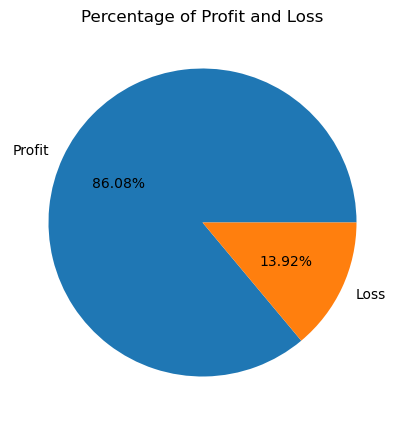

In [30]:
#Total transactions by Profit Labels
fig,ax=plt.subplots(figsize=(5,5))
count=Counter(df['Profit_Label'])
ax.set_title('Percentage of Profit and Loss')
ax.pie(count.values(),labels=count.keys(),autopct=lambda p:f'{p:.2f}%');

#### My Observation
We had 86% profit and 14% loss,we need to look at the cause of that and look at how to maximize that

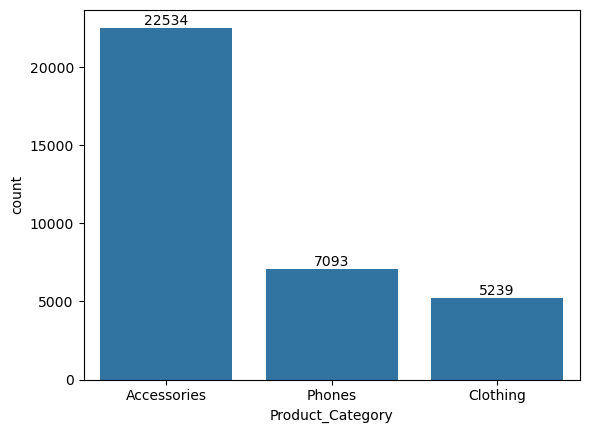

In [31]:
#Product category-How many transaction by product category
ax=sns.countplot(x=df['Product_Category'],order=df['Product_Category'].value_counts(ascending=False).index)#This line arranges in descending order.
value=df['Product_Category'].value_counts(ascending=False).values #This line gets the value of each index
ax.bar_label(container=ax.containers[0],labels=value);#This line adds labels to each bars

#### My Observation.
Under the product category,Accessories had the most transactions followed by phone and then clothing 

In [32]:
df.head()

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0 2016-02-19     High        Segun            29               F  Abia   
1 2016-02-20     High        Segun            29               F  Abia   
2 2016-02-27     High        Segun            29               F  Abia   
3 2016-03-12     High        Segun            29               F  Abia   
4 2016-03-12     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  ...  Unit_Price  \
0      Accessories     Keyboard         Online       1.0  ...      109.00   
1         Clothing  Polo shirts         Online       2.0  ...       28.50   
2      Accessories     Keyboard         Online       3.0  ...        5.00   
3      Accessories     Keyboard         Online       2.0  ...      116.50   
4      Accessories     Keyboard         Online       3.0  ...       41.67   

   year  month  monthname quarter     age_group    Cost  Revenue  Profit  \
0  2016      2   February       1  28-38 Youths   80.00   109.00   29.00   
1  2016      2   February       1  28-38 Youths   49.00    57.00    8.00   
2  2016      2   February       1  28-38 Youths   11.01    15.00    3.99   
3  2016      3      March       1  28-38 Youths  175.00   233.00   58.00   
4  2016      3      March       1  28-38 Youths  105.00   125.01   20.01   

   Profit_Label  
0        Profit  
1        Profit  
2        Profit  
3        Profit  
4        Profit  

[5 rows x 21 columns]

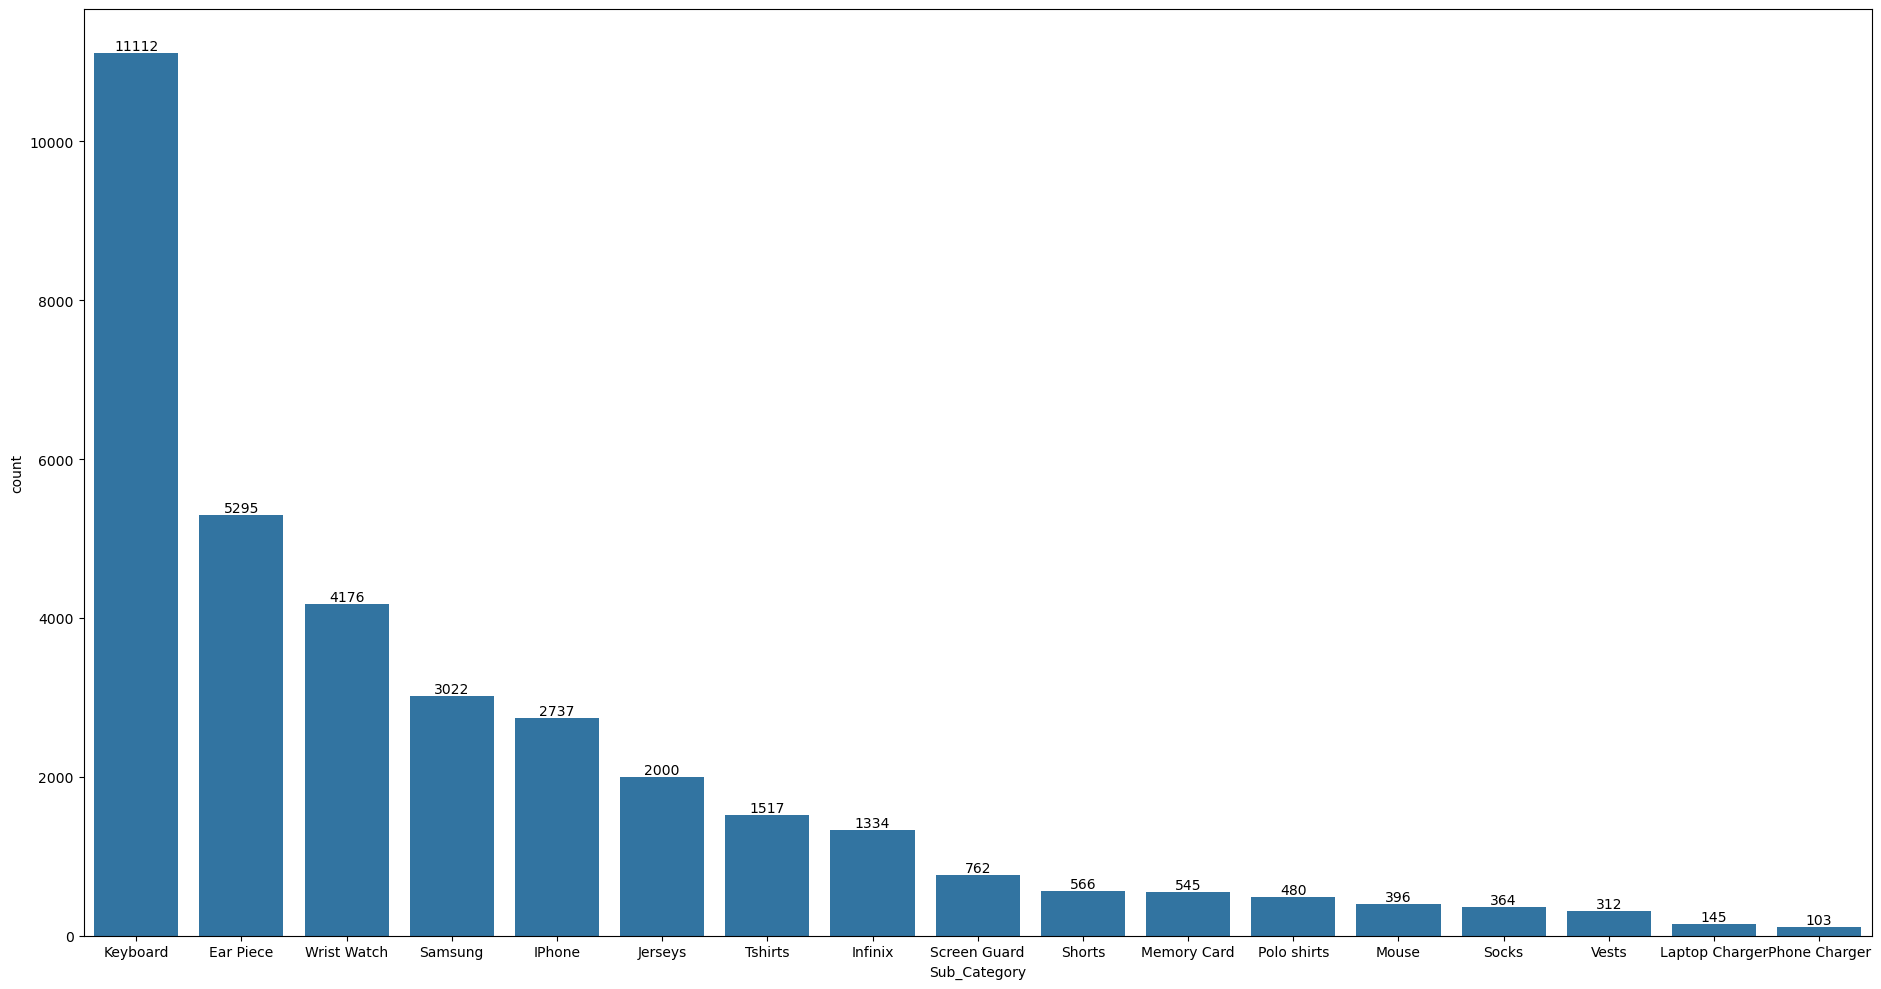

In [33]:
#Sub-category:How many transaction by sub-category
plt.figure(figsize=(19,10))
ax=sns.countplot(x=df['Sub_Category'],order=df['Sub_Category'].value_counts(ascending=False).index)#This line arranges in descending order.
value=df['Sub_Category'].value_counts(ascending=False).values #This line gets the value of each index
ax.bar_label(container=ax.containers[0],labels=value);#This line adds labels to each bars
plt.tight_layout()

#### My Observation
The top-performing sub-categories are keyboards, followed by earpieces and wristwatches. On the other hand, the lowest-performing sub-categories are vests, laptop chargers, and phone chargers.

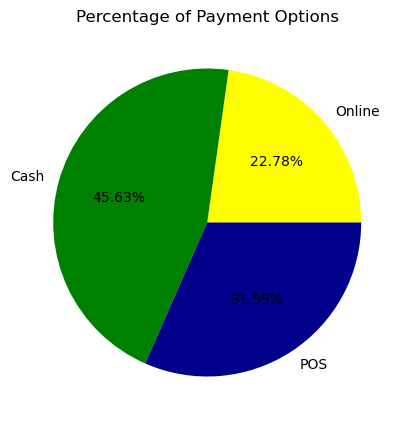

In [34]:
#Payment Option:Percentage of payment options
fig,ax=plt.subplots(figsize=(5,5))
count=Counter(df['Payment Option'])
ax.set_title('Percentage of Payment Options')
ax.pie(count.values(),labels=count.keys(),autopct=lambda p:f'{p:.2f}%',colors=['yellow','green','darkblue']);

#### My Observation
Most transactions are made with cash, followed by POS, and then online payments.

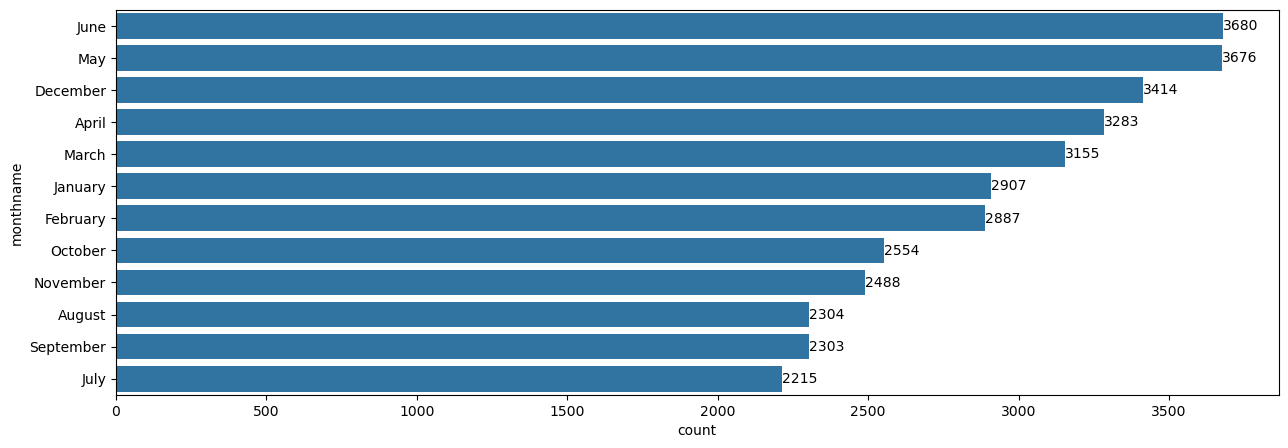

In [35]:
#Total Transactions by months.
plt.figure(figsize=(15,5))
ax=sns.countplot(y=df['monthname'],order=df['monthname'].value_counts(ascending=False).index)#Change x to y to change from columnchart to barchart
value=df['monthname'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=value);

#### My Observation
June,May and December are the peak months while August,September and July are the least peak month.

### Numerical Data Visualization

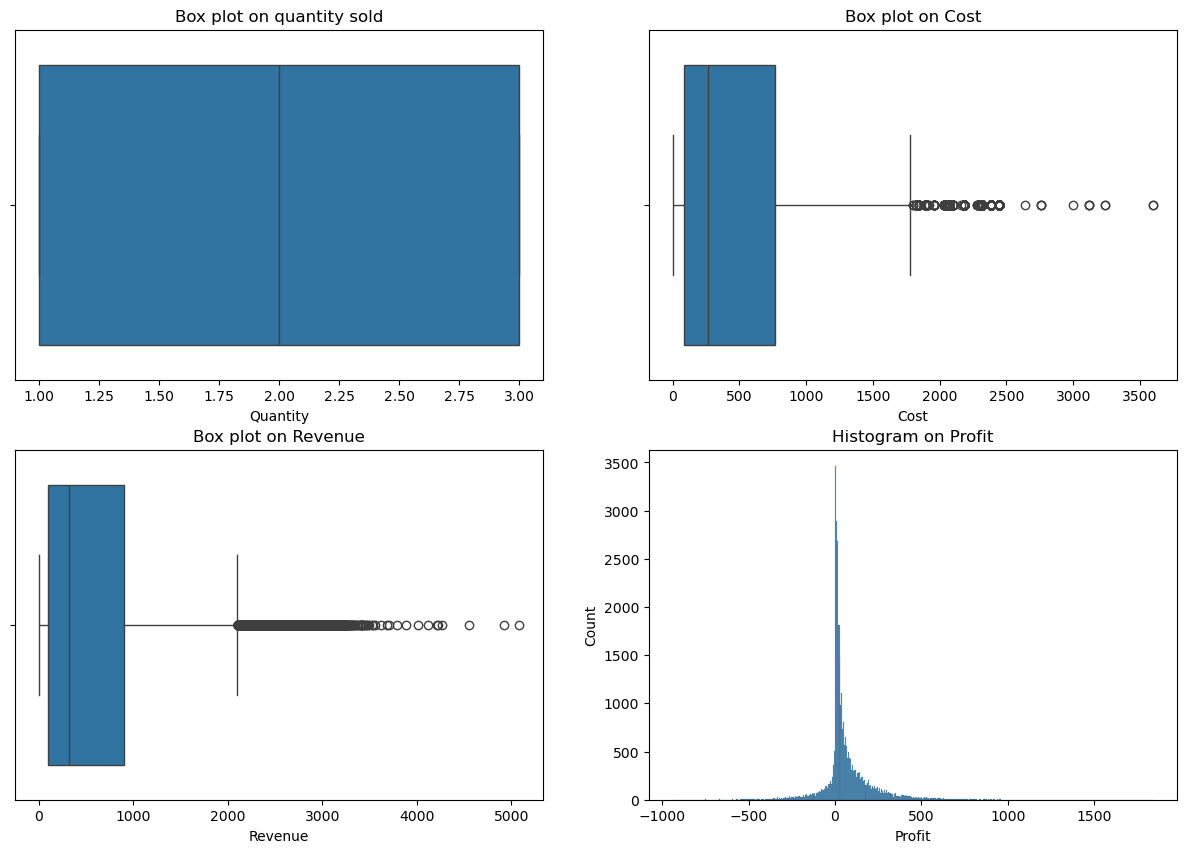

In [36]:
#Quantity Cost Revenue and Profit
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
ax=ax.flatten()

sns.boxplot(x="Quantity",data=df,ax=ax[0])
ax[0].set_title("Box plot on quantity sold")

sns.boxplot(x="Cost",data=df,ax=ax[1])
ax[1].set_title("Box plot on Cost")

sns.boxplot(x="Revenue",data=df,ax=ax[2])
ax[2].set_title("Box plot on Revenue")

sns.histplot(x="Profit",data=df,ax=ax[3])
ax[3].set_title("Histogram on Profit");


#### My Observation
- Customers typically buy small quantities (1–3 items) at a time.
- Cost, however, is highly variable: most transactions are low-to-moderate cost, but there are significant outliers where customers spend far more than average.
- Majority of sales are low-value, but a few high-value transactions significantly increase total revenue.
- Most transactions yield very little profit (near break-even), but there are occasional cases of high profit or significant loss.

#### Bivariate Analysis
Bivariate analysis involves analyzing the relationship between two variables

- Profit

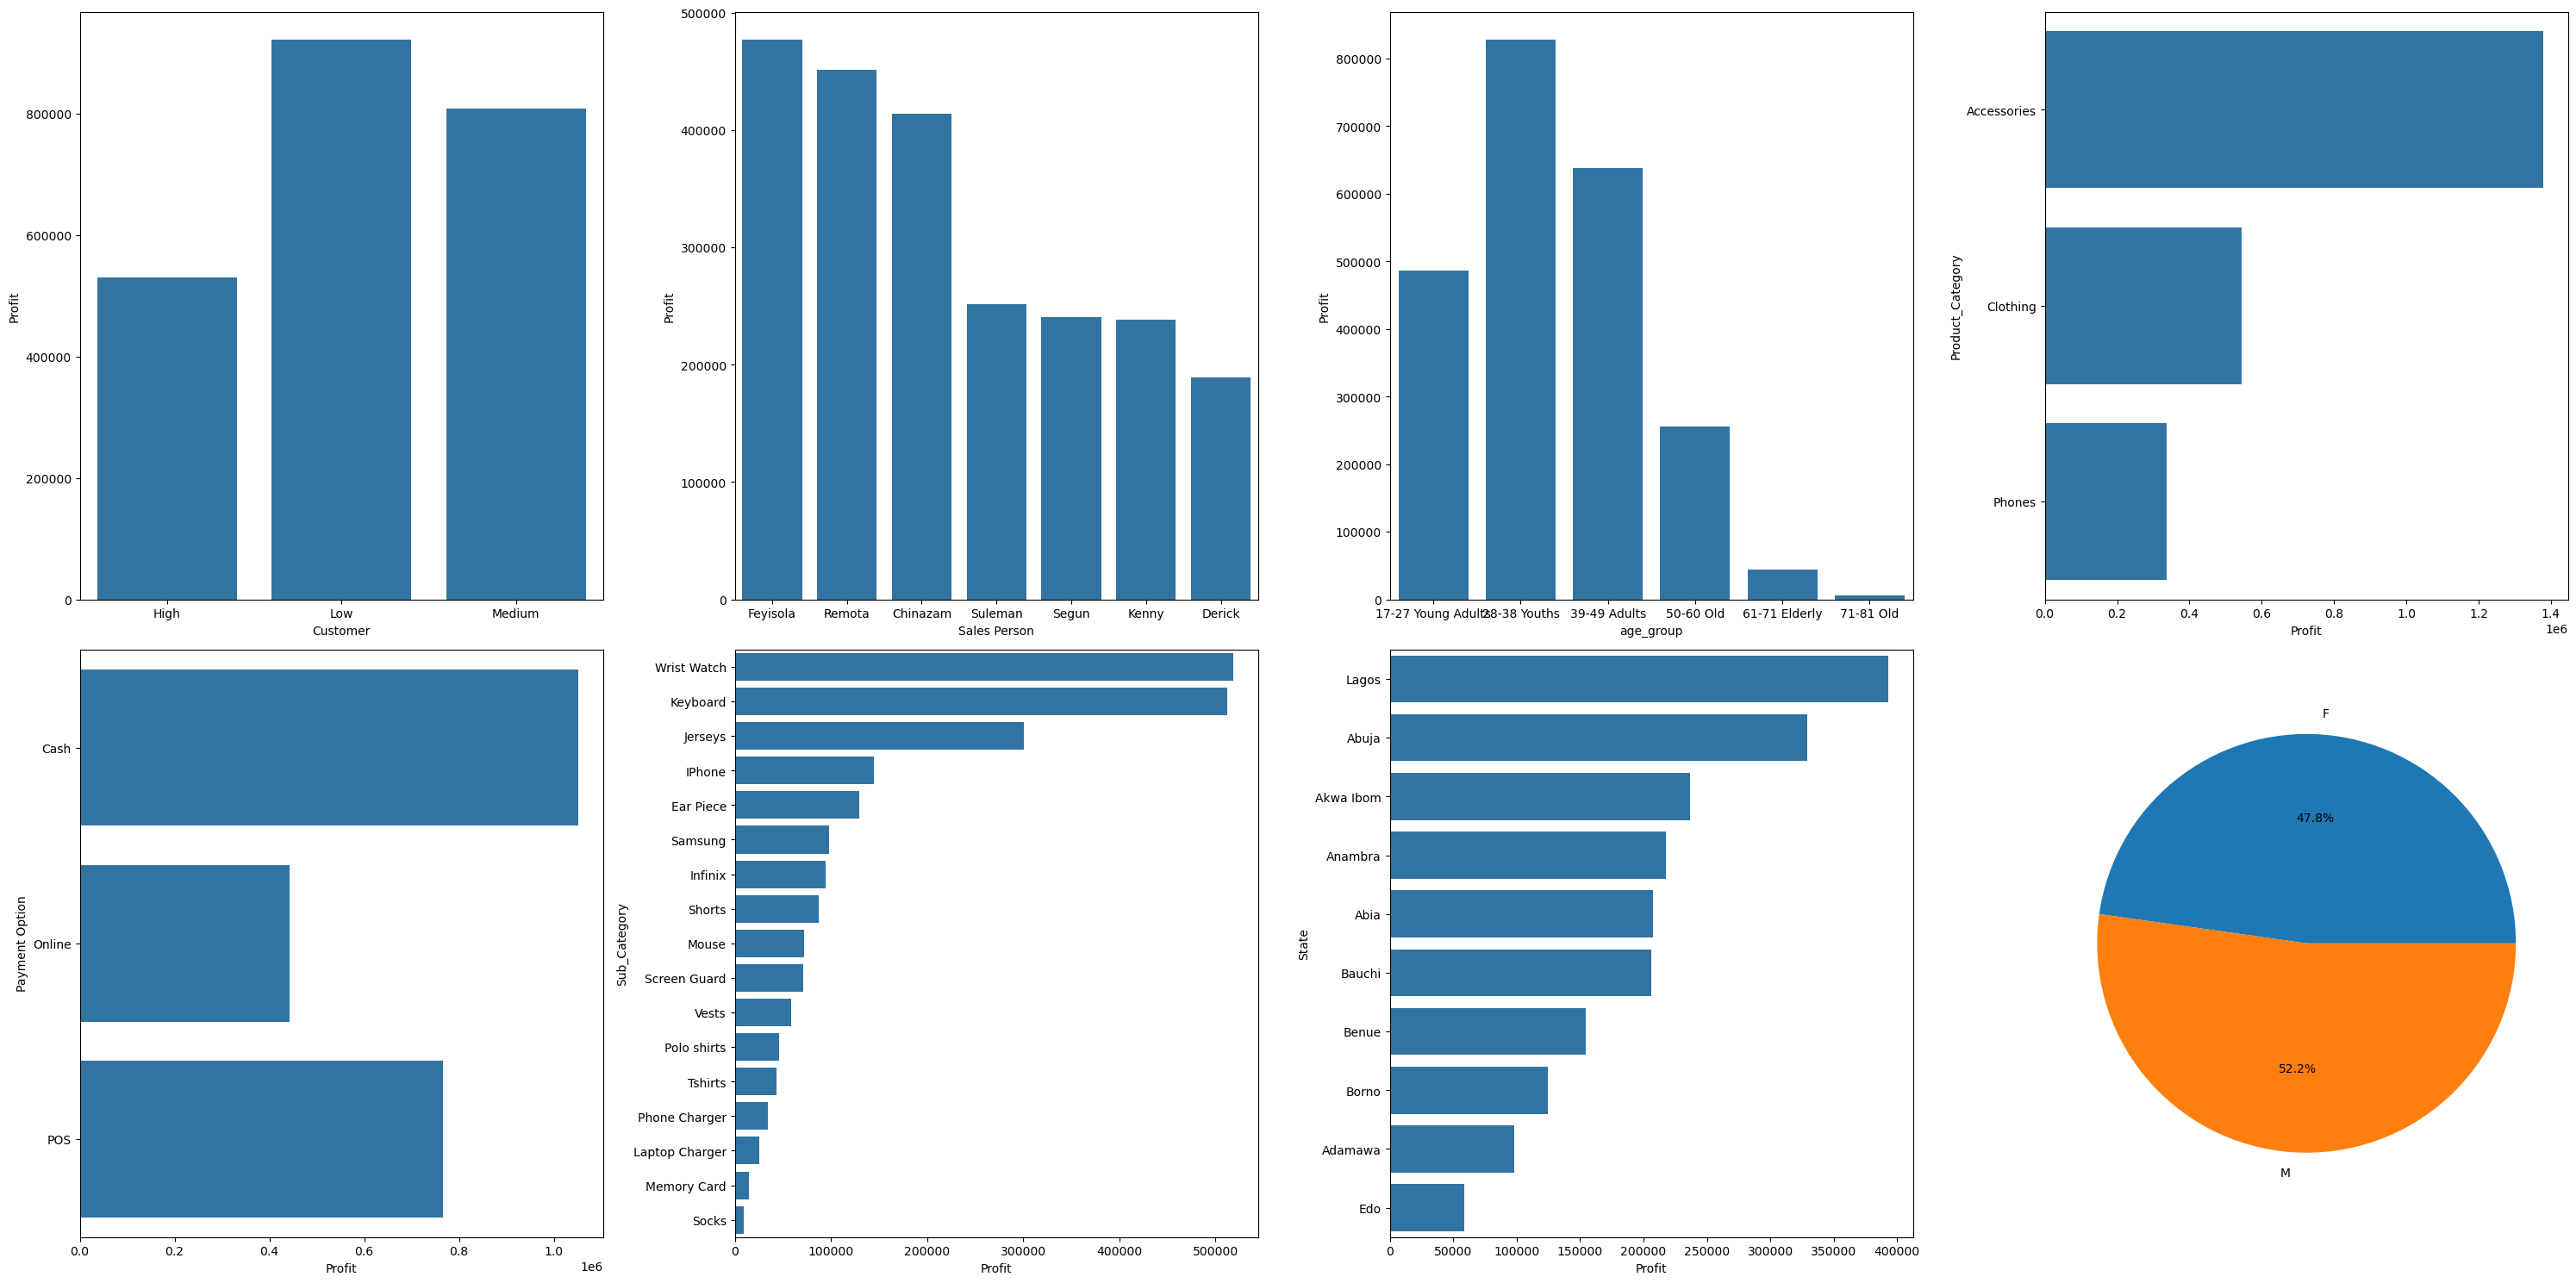

In [37]:
#Categorical columns

fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(30,15))
ax=ax.flatten()
cust_prof=df.groupby("Customer")['Profit'].sum().reset_index()
sns.barplot(x="Customer",data=cust_prof,y="Profit",ax=ax[0])

sp_prof=df.groupby("Sales Person")['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
sns.barplot(x="Sales Person",data=sp_prof,y="Profit",ax=ax[1])

ag_prof=df.groupby("age_group")['Profit'].sum().reset_index()
sns.barplot(x="age_group",data=ag_prof,y="Profit",ax=ax[2])

pc_prof=df.groupby("Product_Category")['Profit'].sum().reset_index()
sns.barplot(y="Product_Category",data=pc_prof,x="Profit",ax=ax[3])

po_prof=df.groupby("Payment Option")['Profit'].sum().reset_index()
sns.barplot(y="Payment Option",data=po_prof,x="Profit",ax=ax[4])

sc_prof=df.groupby("Sub_Category")['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
sns.barplot(y="Sub_Category",data=sc_prof,x="Profit",ax=ax[5])

top10 = df.groupby("State")['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False).head(10)
sns.barplot(y="State", data=top10, x="Profit", ax=ax[6])

gender_prof = df.groupby("Customer_Gender")['Profit'].sum()
plt.pie(gender_prof.values, labels=gender_prof.index, autopct='%1.1f%%')


plt.tight_layout()
plt.show();

#### My Observation
- Customer Segments: Low-tier customers generate the highest income, followed by medium, then high-tier customers. This aligns with our earlier univariate analysis, which showed low-tier customers driving the most transactions.

- Top Customers: While Remota and Chinazam recorded the highest number of transactions, Feyisola emerged as the most profitable customer, surpassing them in overall profit contribution.

- Age Groups: The 28–38 age group is our strongest profit driver, followed by the 39–49 segment and then the 17–27 young adults. This reinforces the insight from our univariate analysis.

- Product Categories: Accessories lead in profitability as expected. Interestingly, although phones recorded over 2,000 transactions (higher than clothing), clothing outperformed phones in profit contribution.

- Payment Methods: Cash remains the most dominant payment channel, followed by POS and then online transactions, consistent with the pie chart analysis.

- Sub-categories: Despite keyboards recording more transactions, wristwatches yielded slightly higher profits.

- Regional Insights: Lagos and Abuja stand out as transaction and profit hotspots, consistent with earlier transaction analysis.

- Gender Dynamics: Male customers generate about 5% more profit than female customers, even though female customers carry out more transactions overall.

- Revenue

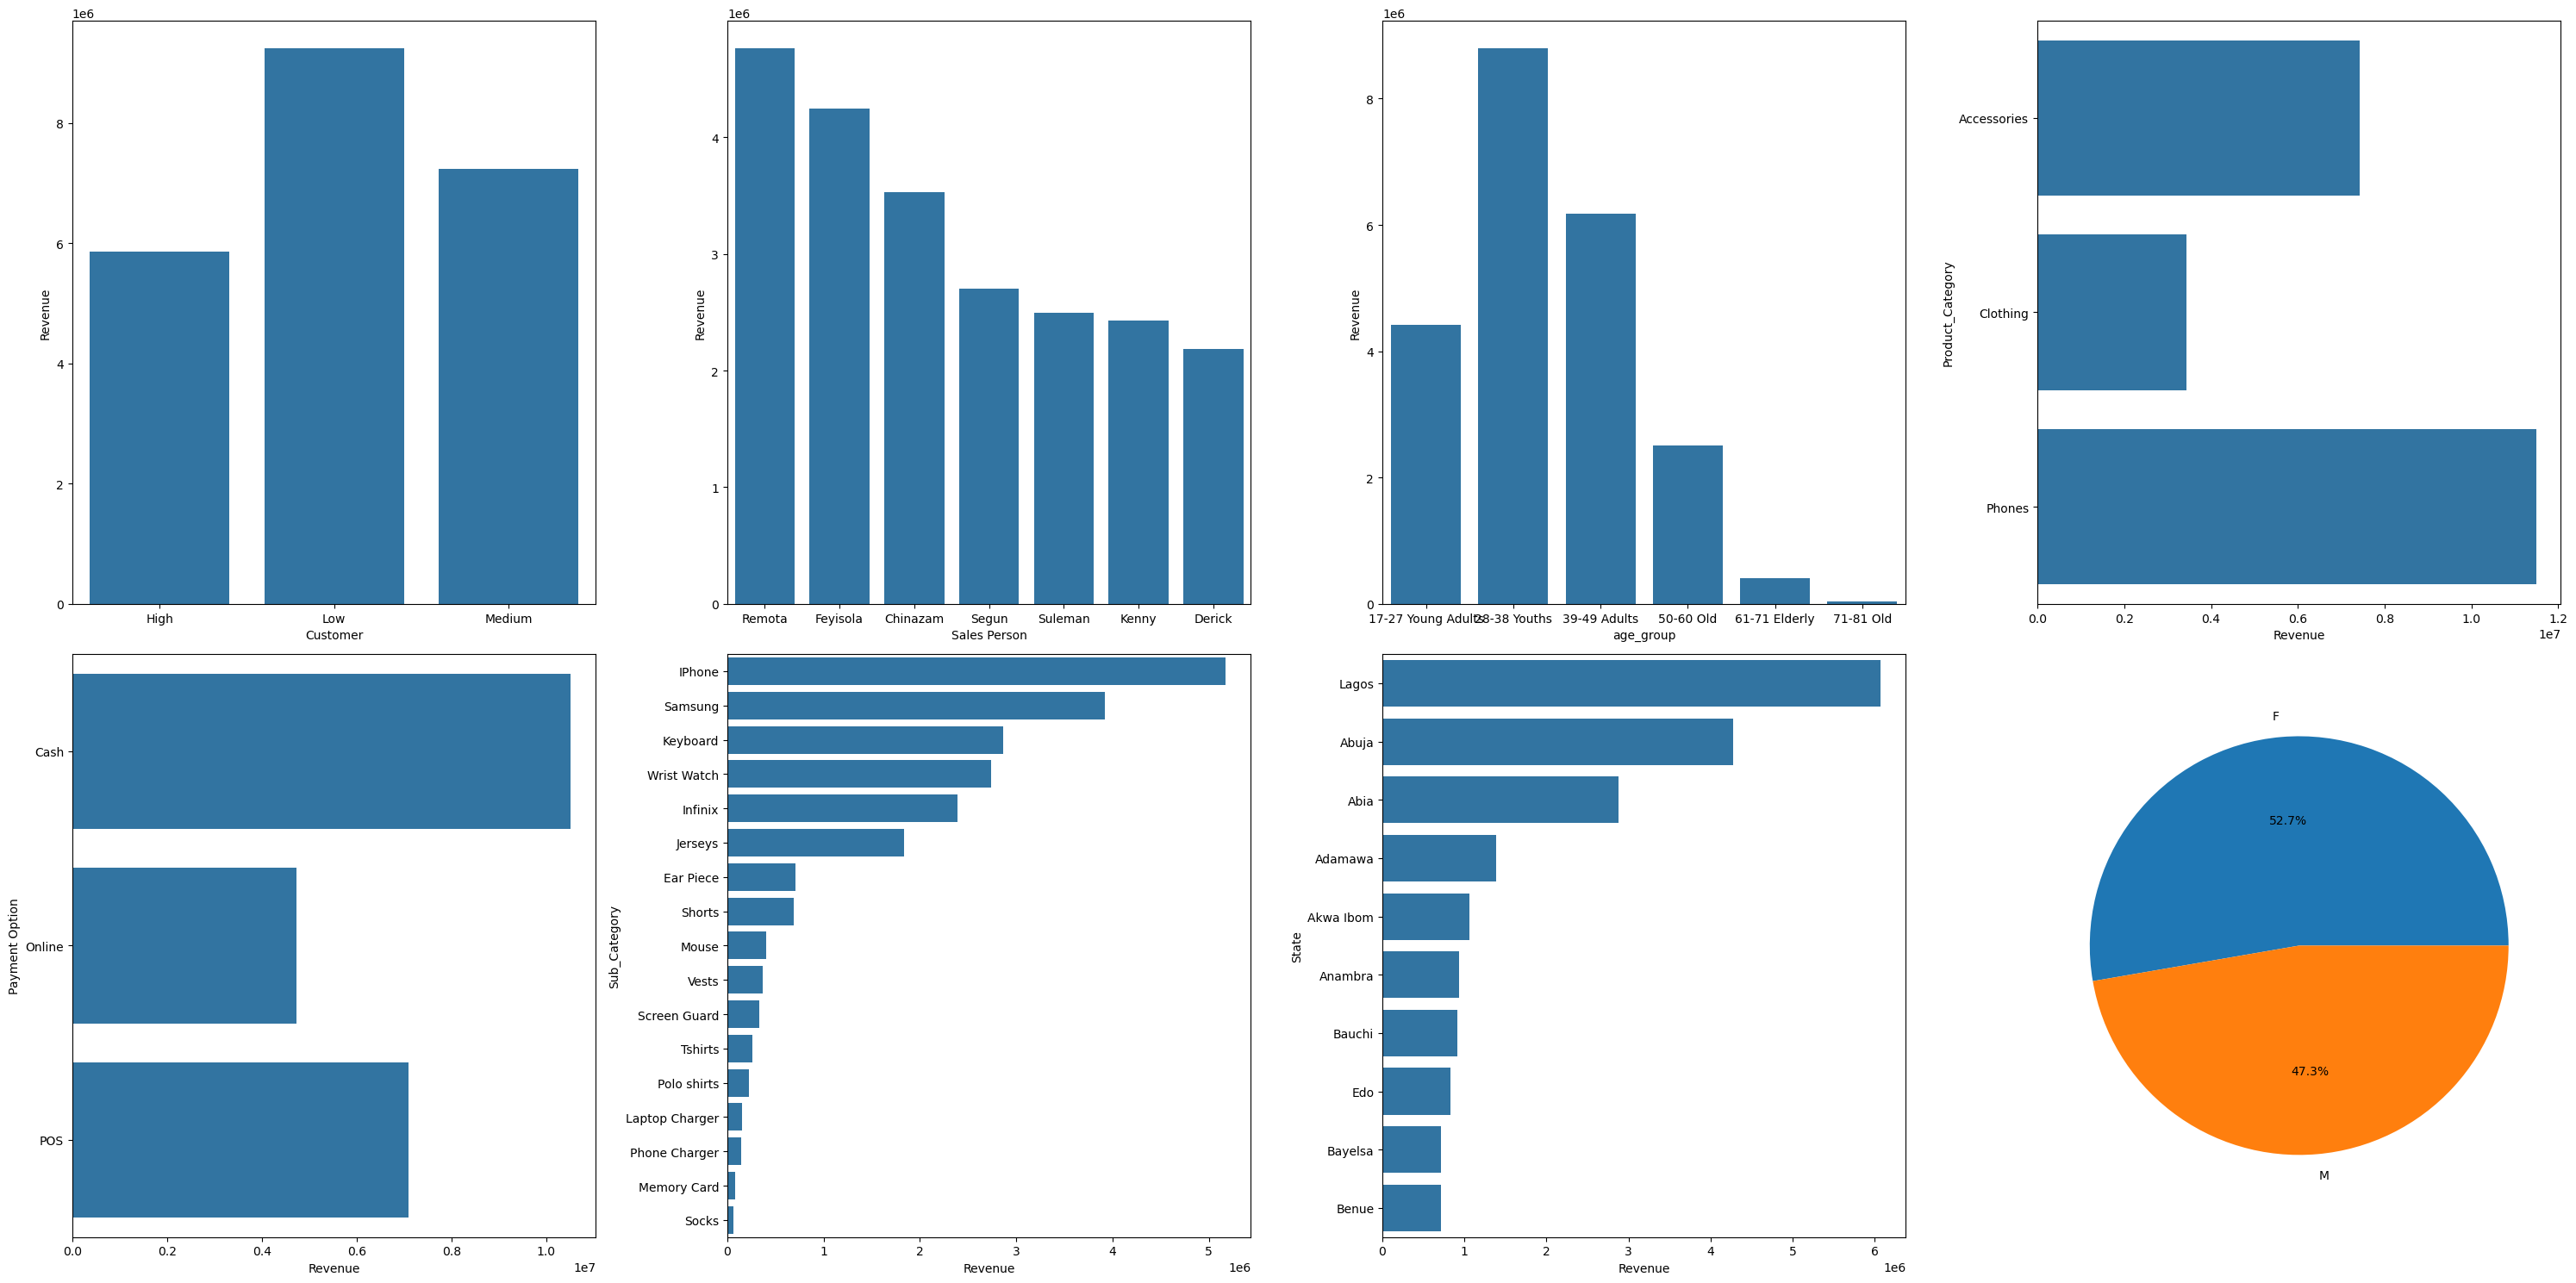

In [38]:
#categorical columns
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(30,15))
ax=ax.flatten()
cust_rev=df.groupby("Customer")['Revenue'].sum().reset_index()
sns.barplot(x="Customer",data=cust_rev,y="Revenue",ax=ax[0])

sp_rev=df.groupby("Sales Person")['Revenue'].sum().reset_index().sort_values(by='Revenue',ascending=False)
sns.barplot(x="Sales Person",data=sp_rev,y="Revenue",ax=ax[1])

ag_rev=df.groupby("age_group")['Revenue'].sum().reset_index()
sns.barplot(x="age_group",data=ag_rev,y="Revenue",ax=ax[2])

pc_rev=df.groupby("Product_Category")['Revenue'].sum().reset_index()
sns.barplot(y="Product_Category",data=pc_rev,x="Revenue",ax=ax[3])

po_rev=df.groupby("Payment Option")['Revenue'].sum().reset_index()
sns.barplot(y="Payment Option",data=po_rev,x="Revenue",ax=ax[4])

sc_rev=df.groupby("Sub_Category")['Revenue'].sum().reset_index().sort_values(by='Revenue',ascending=False)
sns.barplot(y="Sub_Category",data=sc_rev,x="Revenue",ax=ax[5])

top10rev = df.groupby("State")['Revenue'].sum().reset_index().sort_values(by='Revenue',ascending=False).head(10)
sns.barplot(y="State", data=top10rev, x="Revenue", ax=ax[6])

gender_rev = df.groupby("Customer_Gender")['Revenue'].sum()
plt.pie(gender_rev.values, labels=gender_rev.index, autopct='%1.1f%%')


plt.tight_layout()
plt.show();

#### My Observation
- Customer Segments: The same pattern is consistent across transactions, revenue, and profit — low-tier customers lead, followed by medium-tier, then high-tier customers.

- Salespersons: Remota generates the highest revenue among all sales representatives.

- Age Groups: The trend remains consistent across all metrics — youth (28–38) contribute the most, followed by adults (39–49), then young adults (17–27).
gories: Accessories, clothing, and phones are the top three contributors to both revenue and profit.

- Product Brands: Interestingly, iPhones and Samsung devices drive more revenue than keyboards and wristwatches, even though the latter two generate higher profits.

- Regional Insights: Lagos, Abuja, and Abia record the highest transactions and revenue. However, Abia drops out of the top three in terms of profit, with Akwa Ibom emerging third in profit contribution.

- Gender Dynamics: Females generate more revenue overall, but males deliver higher profits despite fewer transactions.

In [39]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'monthname',
       'quarter', 'age_group', 'Cost', 'Revenue', 'Profit', 'Profit_Label'],
      dtype='object')

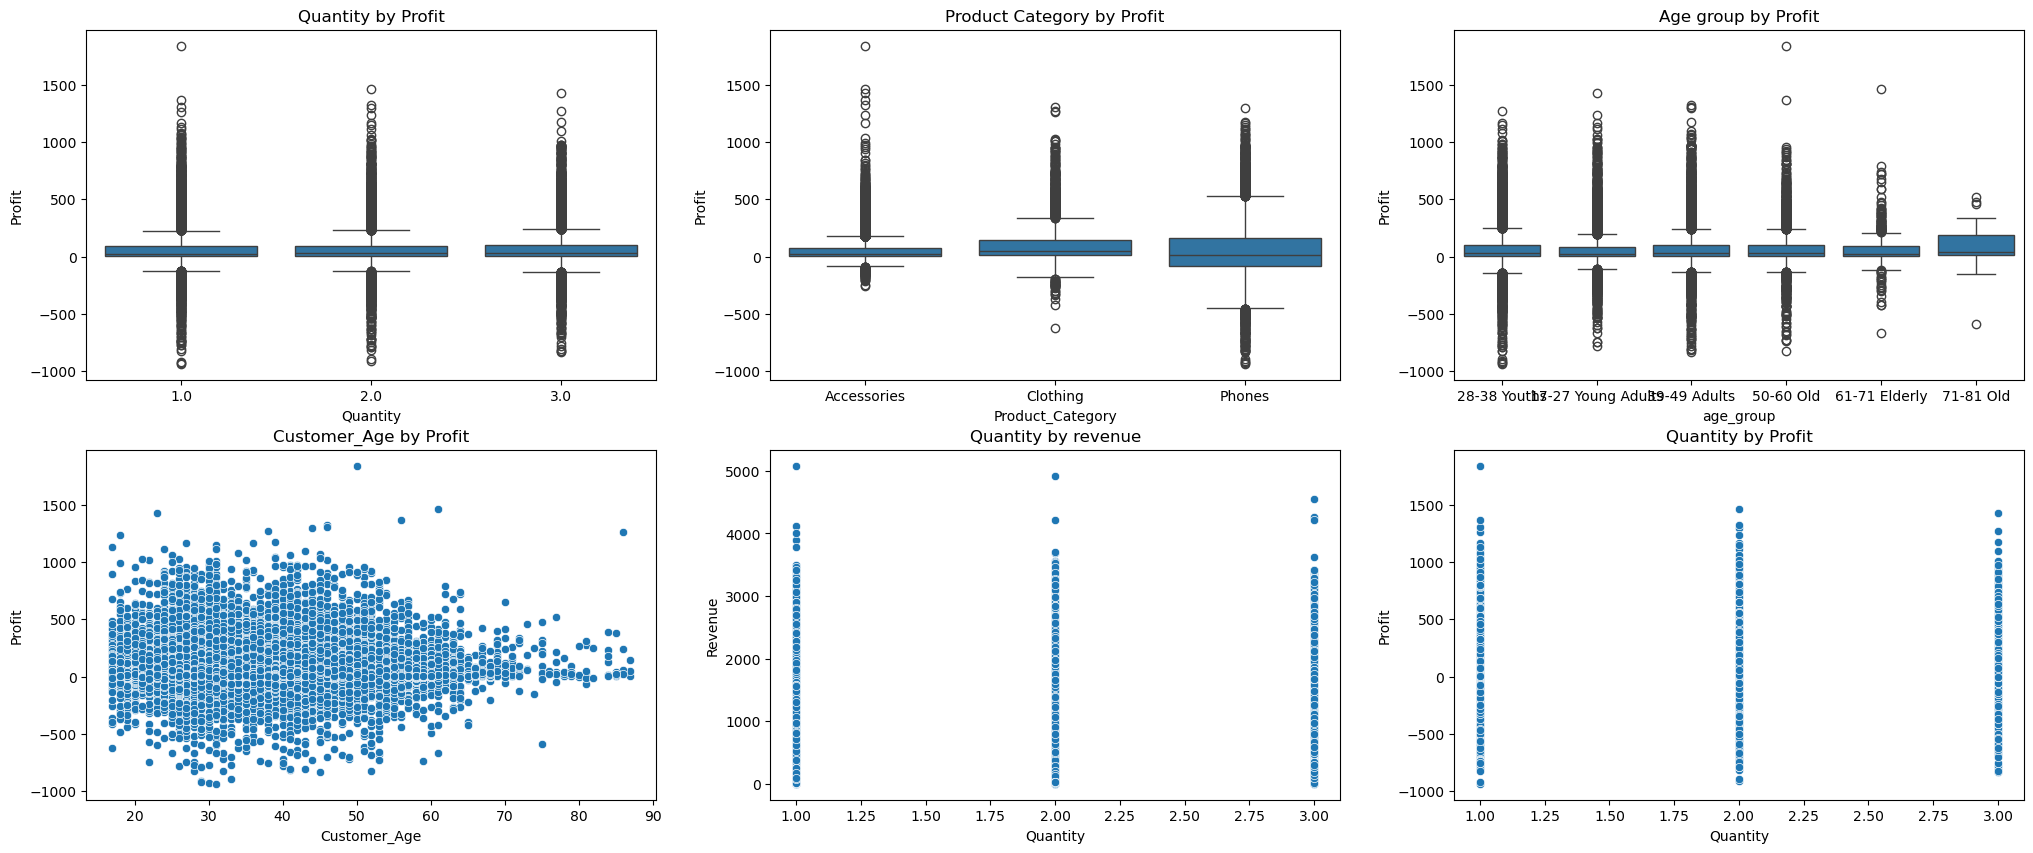

In [40]:
# Numerical columns
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(25,10))
ax=ax.flatten()
sns.boxplot(x='Quantity',y='Profit',data=df,ax=ax[0])
ax[0].set_title('Quantity by Profit')

sns.boxplot(x='Product_Category',y='Profit',data=df,ax=ax[1])
ax[1].set_title('Product Category by Profit')

sns.boxplot(x='age_group',y='Profit',data=df,ax=ax[2])
ax[2].set_title('Age group by Profit')

sns.scatterplot(x='Customer_Age',y='Profit',data=df,ax=ax[3])
ax[3].set_title('Customer_Age by Profit')

sns.scatterplot(x='Quantity',y='Revenue',data=df,ax=ax[4])
ax[4].set_title('Quantity by revenue')

sns.scatterplot(x='Quantity',y='Profit',data=df,ax=ax[5])
ax[5].set_title('Quantity by Profit')

plt.show()

#### My Observation
- Accessories generate the highest and most consistent profits, with fewer extreme losses compared to the others.
- Profit distribution is fairly similar across quantities (1, 2, or 3)This means selling a higher quantity doesn’t necessarily guarantee higher profit,profit levels remain scattered and highly variable.
- Youths (28–38) and Adults (39–49) drive the most consistent profits.This confirms that the 28–49 age bracket is the most profitable customer base.
- Revenue clearly increases with higher quantities.Customers buying 2 or 3 items generate much higher revenue spikes compared to those buying just 1.
This suggests that encouraging bulk purchases could significantly boost revenue

#### Multivariate analysis:
It involves analyzing the relationship between three or more variables.

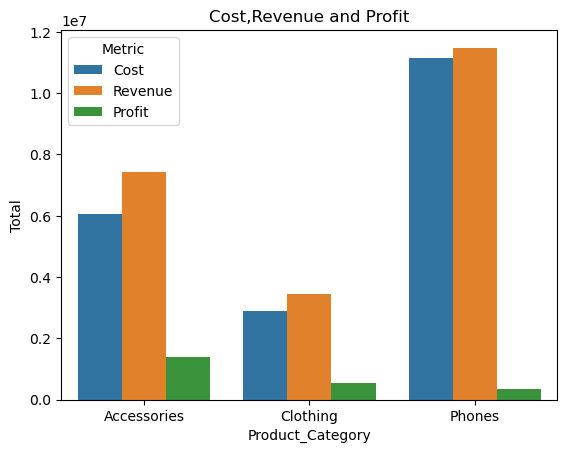

In [41]:
#Product category against coost,revenue and profit,procat for product category
procat=df.groupby("Product_Category")[['Cost','Revenue','Profit']].sum().reset_index()#Grouping by the 3 variables we want to see.
procat=pd.melt(procat,id_vars='Product_Category',var_name='Metric',value_name='Total')#Melt is used to transpose data.
sns.barplot(data=procat,x="Product_Category",y="Total",hue="Metric")
plt.title("Cost,Revenue and Profit");

#### My Observation
Accessories generate the highest profit, while phones — despite having the highest cost and revenue — yield relatively low profit. This is unusual and worth investigating further. It may indicate a low profit margin on phones, which should be analyzed to understand the underlying cause.

#### My Observation

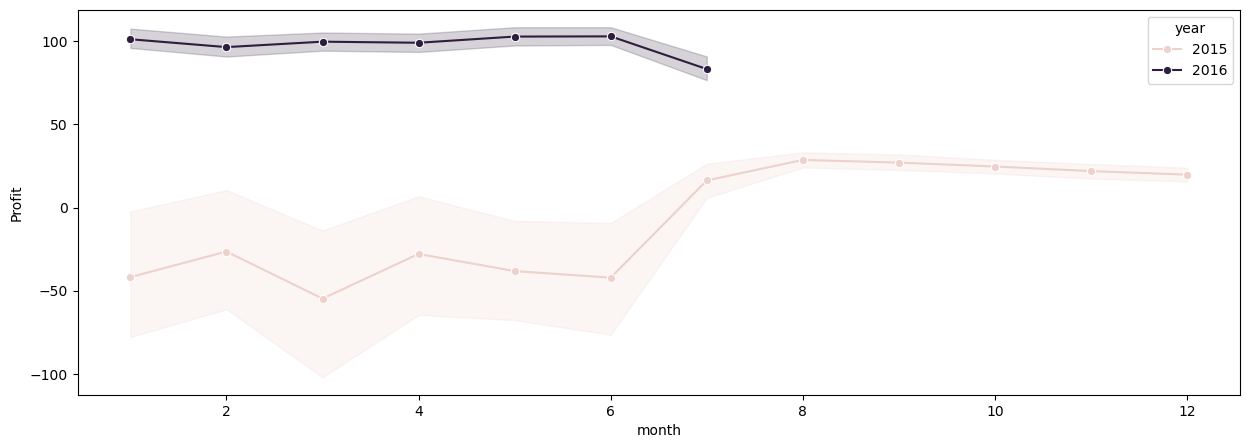

In [42]:
plt.figure(figsize=(15,5))
sns.lineplot(x='month',y='Profit',data=df,hue='year',marker='o');

In [48]:
#Using pivot tables in Python
df.pivot_table(values='Profit',index='year',columns='month',aggfunc='sum')

month         1          2          3          4          5          6   \
year                                                                      
2015    -5778.70   -4079.65   -8163.79   -4945.69   -7801.45   -8690.61   
2016   280204.25  263640.18  299777.67  307746.51  356915.59  357549.86   

month         7         8         9         10       11        12  
year                                                               
2015    15104.47  65926.24  62172.33  62950.66  54480.9  67448.12  
2016   107151.79       NaN       NaN       NaN      NaN       NaN

#### My Observation
The line plot and pivot table show that the business experienced losses during the first six months of 2015, but began generating significant profits from the seventh month onward. Profit levels continued to rise into 2016, with a slight dip observed around the sixth month. This drop warrants further investigation to identify potential causes.

In [44]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'monthname',
       'quarter', 'age_group', 'Cost', 'Revenue', 'Profit', 'Profit_Label'],
      dtype='object')

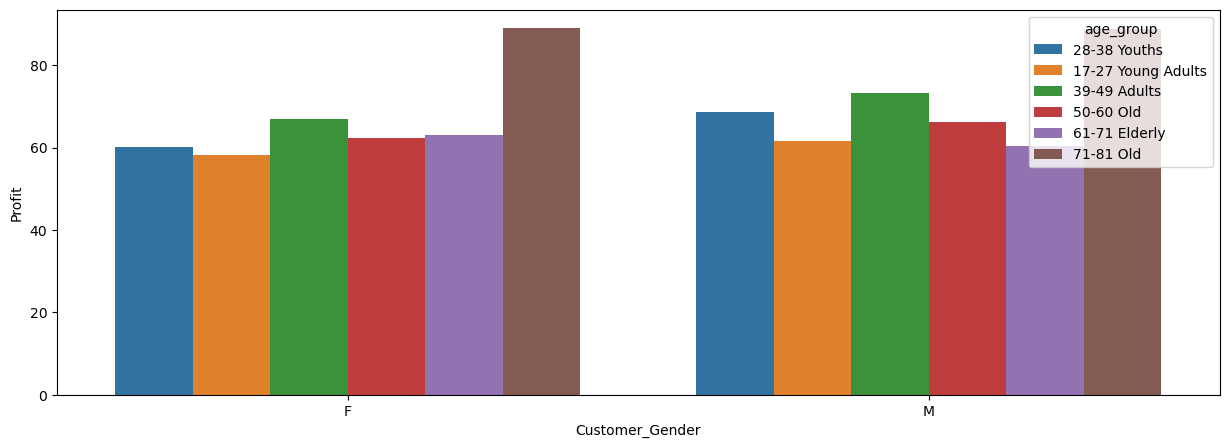

In [69]:
#Customer Gender and Age group by sum of profit
plt.figure(figsize=(15,5))
sns.barplot(x='Customer_Gender',y='Profit',hue='age_group',data=df,errorbar=None );

In [65]:
#Using pivot tables in Python
df.pivot_table(values='Profit',index='Customer_Gender',columns='age_group')

age_group        17-27 Young Adults  28-38 Youths  39-49 Adults  50-60 Old  \
Customer_Gender                                                              
F                         58.132281     60.236364     66.985647  62.423073   
M                         61.484534     68.663171     73.337742  66.160366   

age_group        61-71 Elderly  71-81 Old  
Customer_Gender                            
F                    63.153142  89.058000  
M                    60.421852  88.806154

#### My Observation
The bar plot and pivot table reveal that the 71–81 age group achieves the highest average profit per transaction across both male and female customers. This implies that, although this age group may contribute less to overall sales volume, their purchases yield greater profitability per sale — a valuable insight for targeted marketing or premium product strategies.

#### My Observation

<Axes: >

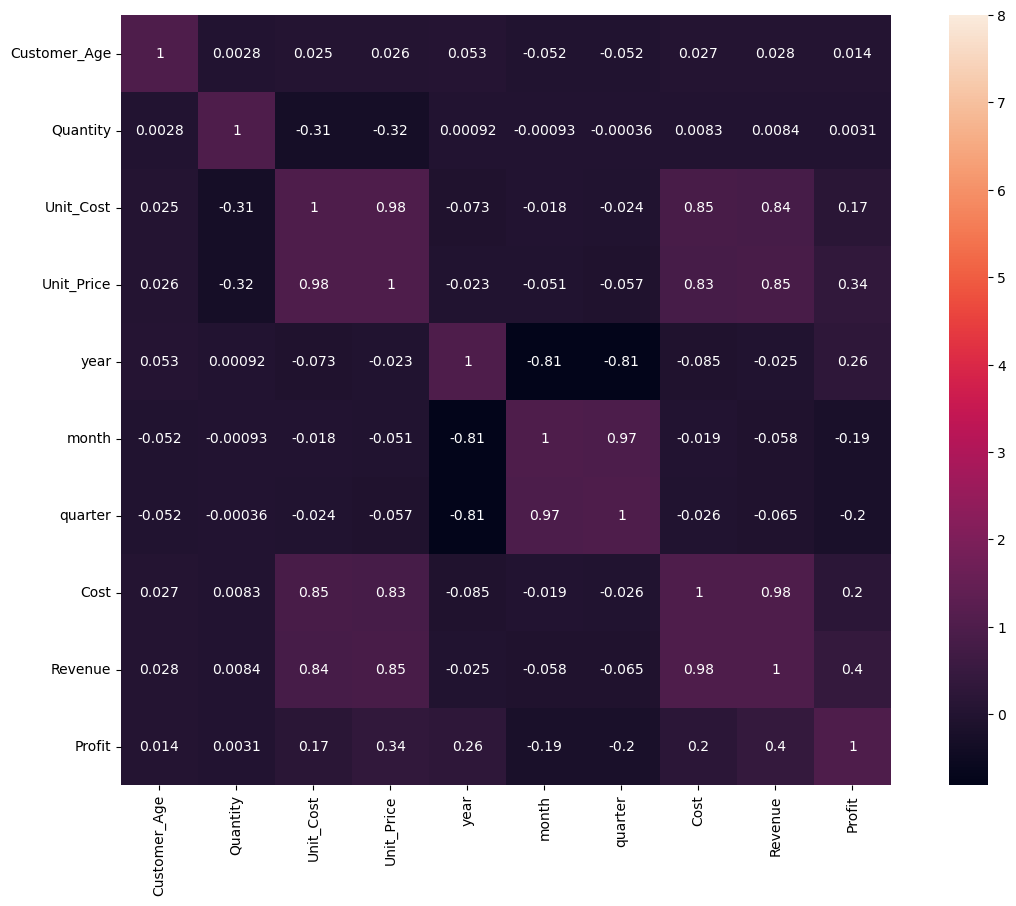

In [70]:
#Correlation,Visualization is key when it comes to EDA
#correlation=df.corr(numeric_only='true')
#correlation
a=df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(15,10))
sns.heatmap(a,vmax=8,square=True,annot=True)

#### My Observation

C:\Users\muham\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


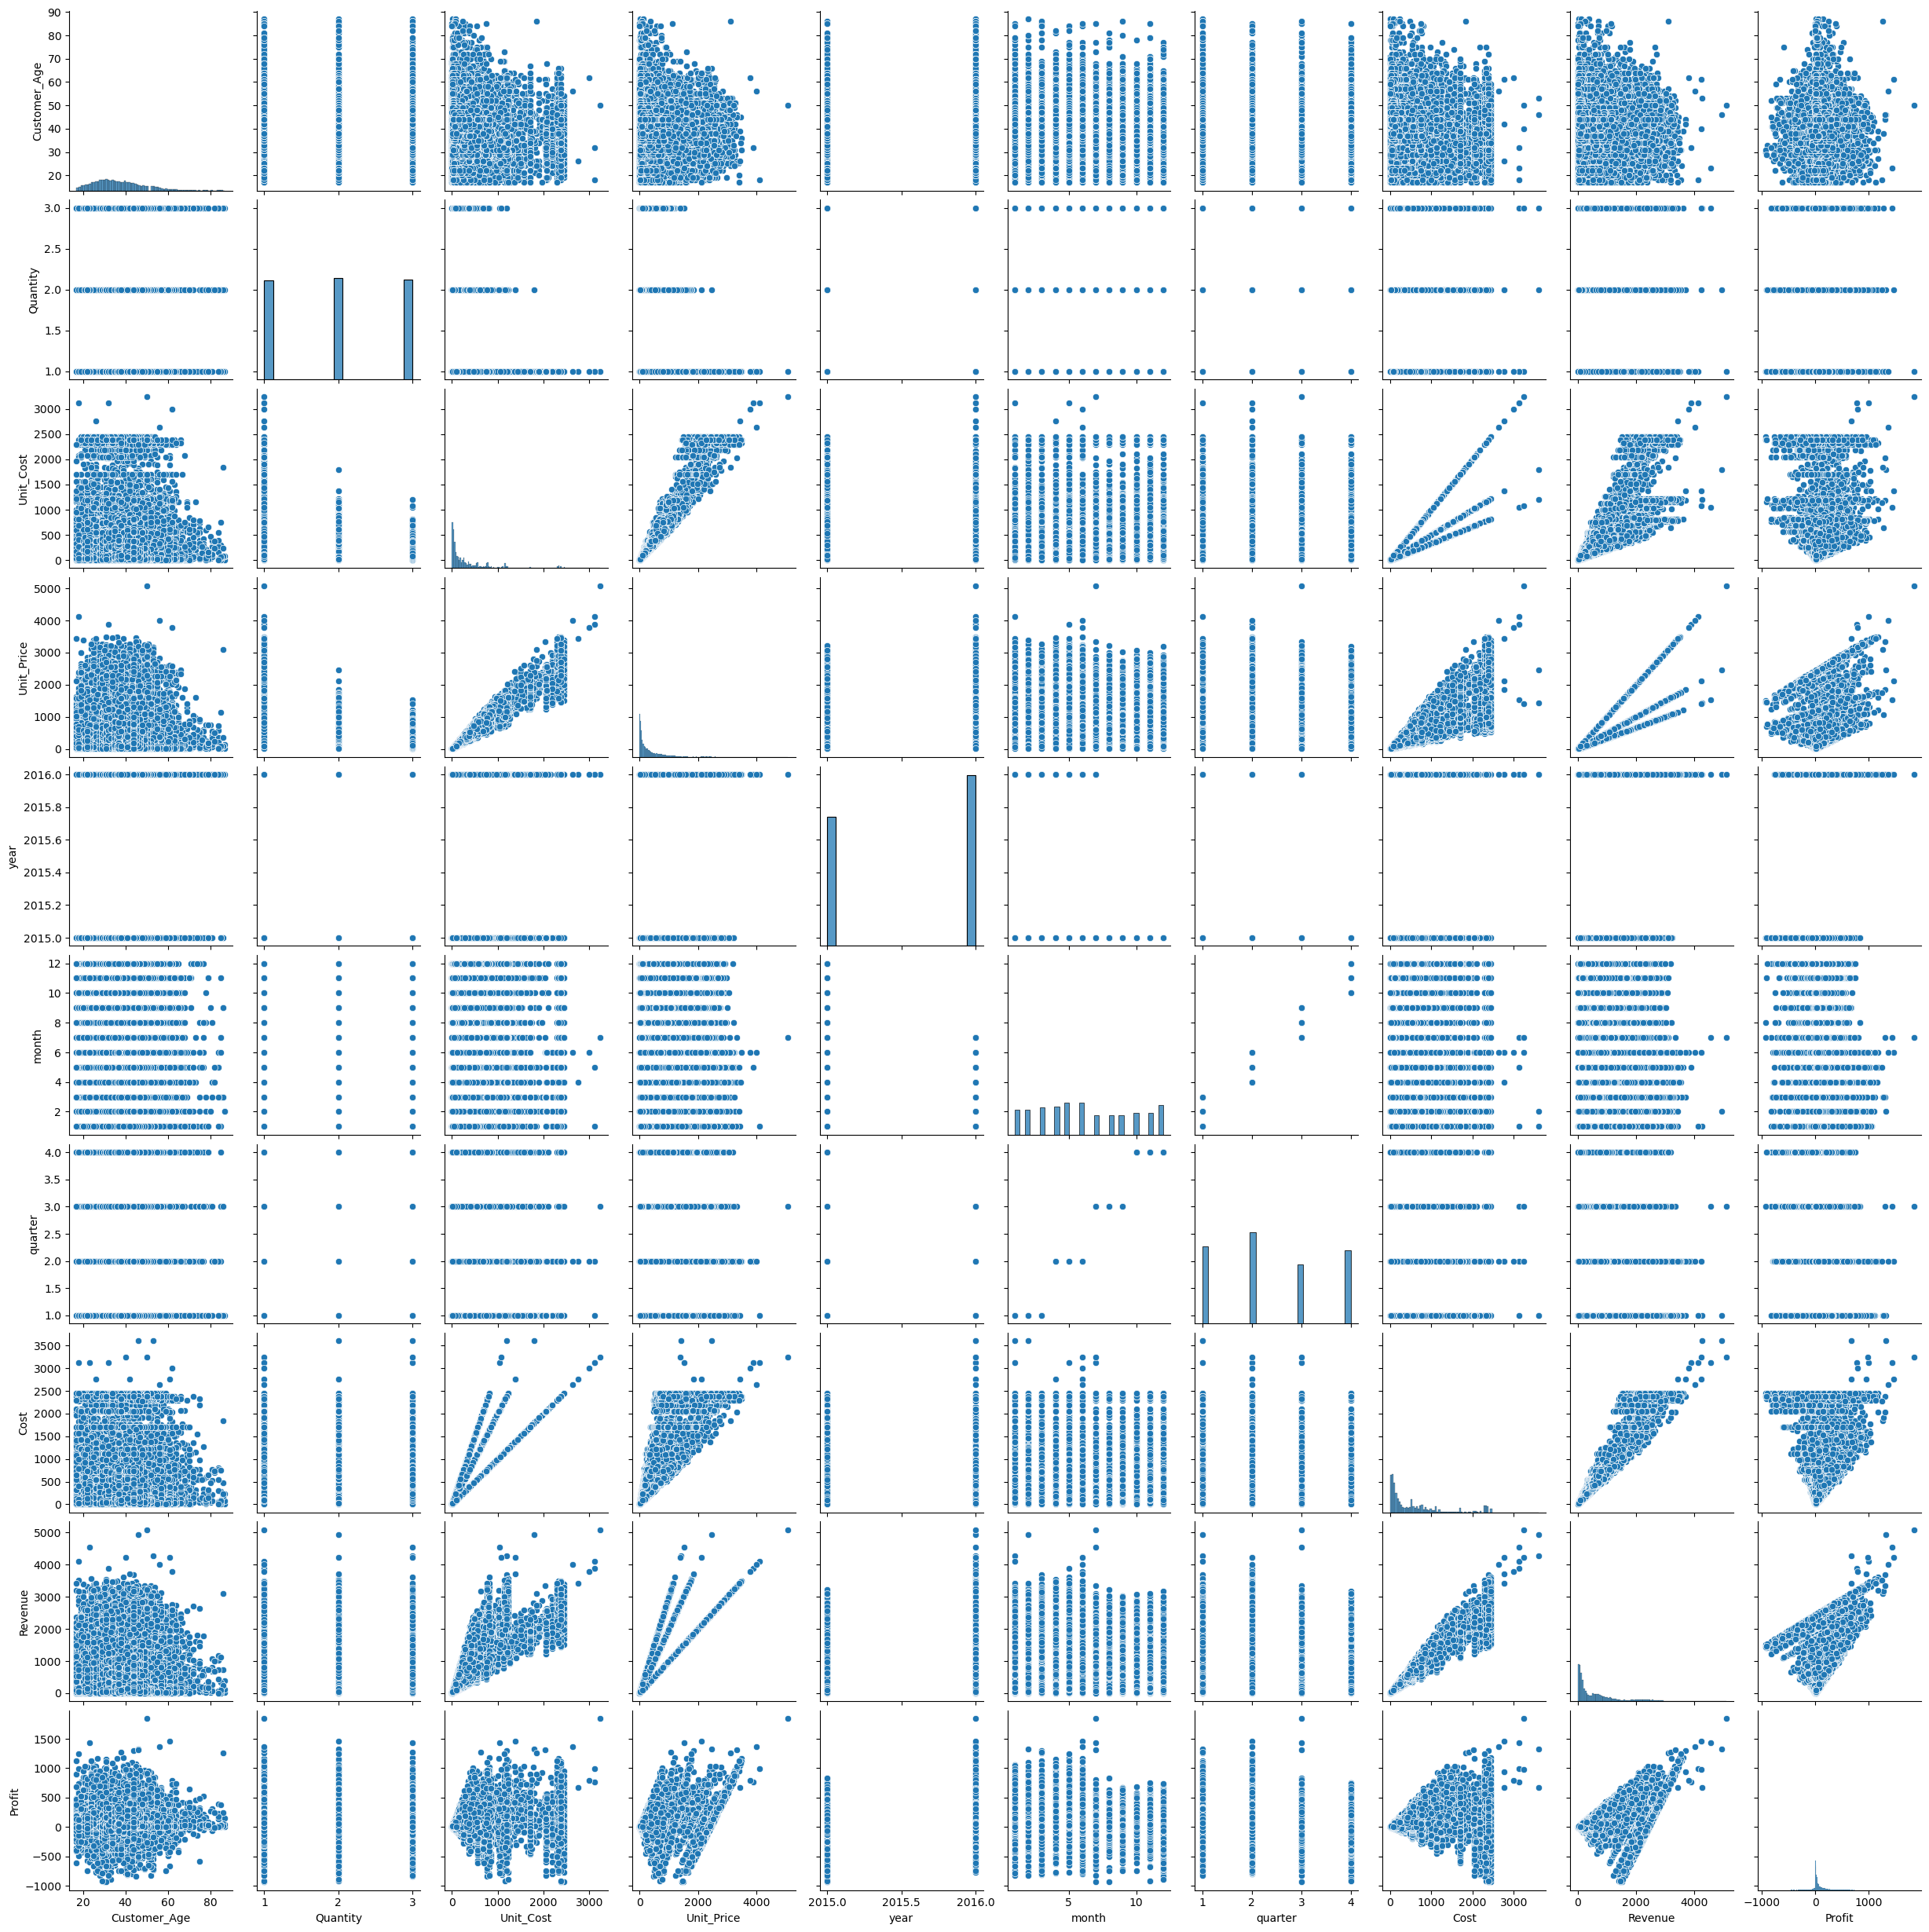

In [72]:
sns.pairplot(df,size=2.5);#Pairplot is only looking at numerical columns and plotting it against themselves

In [73]:
df.head()

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0 2016-02-19     High        Segun            29               F  Abia   
1 2016-02-20     High        Segun            29               F  Abia   
2 2016-02-27     High        Segun            29               F  Abia   
3 2016-03-12     High        Segun            29               F  Abia   
4 2016-03-12     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  ...  Unit_Price  \
0      Accessories     Keyboard         Online       1.0  ...      109.00   
1         Clothing  Polo shirts         Online       2.0  ...       28.50   
2      Accessories     Keyboard         Online       3.0  ...        5.00   
3      Accessories     Keyboard         Online       2.0  ...      116.50   
4      Accessories     Keyboard         Online       3.0  ...       41.67   

   year  month  monthname quarter     age_group    Cost  Revenue  Profit  \
0  2016      2   February       1  28-38 Youths   80.00   109.00   29.00   
1  2016      2   February       1  28-38 Youths   49.00    57.00    8.00   
2  2016      2   February       1  28-38 Youths   11.01    15.00    3.99   
3  2016      3      March       1  28-38 Youths  175.00   233.00   58.00   
4  2016      3      March       1  28-38 Youths  105.00   125.01   20.01   

   Profit_Label  
0        Profit  
1        Profit  
2        Profit  
3        Profit  
4        Profit  

[5 rows x 21 columns]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
 12  year              34866 non-null  int32         
 13  month             34866 non-null  int32         
 14  monthname         34866 non

#### Time Series Analysis

In [75]:
df['Date'].min()

Timestamp('2015-01-01 00:00:00')

In [78]:
df['Date'].max()

Timestamp('2016-07-31 00:00:00')

We have data from 1st of January 2015 to 31st of July 2016

In [79]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'monthname',
       'quarter', 'age_group', 'Cost', 'Revenue', 'Profit', 'Profit_Label'],
      dtype='object')

#### Revenue over time for each product category

In [80]:
df['Product_Category'].unique()

array(['Accessories', 'Clothing', 'Phones'], dtype=object)

In [84]:
accessories=df[df['Product_Category']=='Accessories']
clothing=df[df['Product_Category']=='Clothing']
phones=df[df['Product_Category']=='Phones']

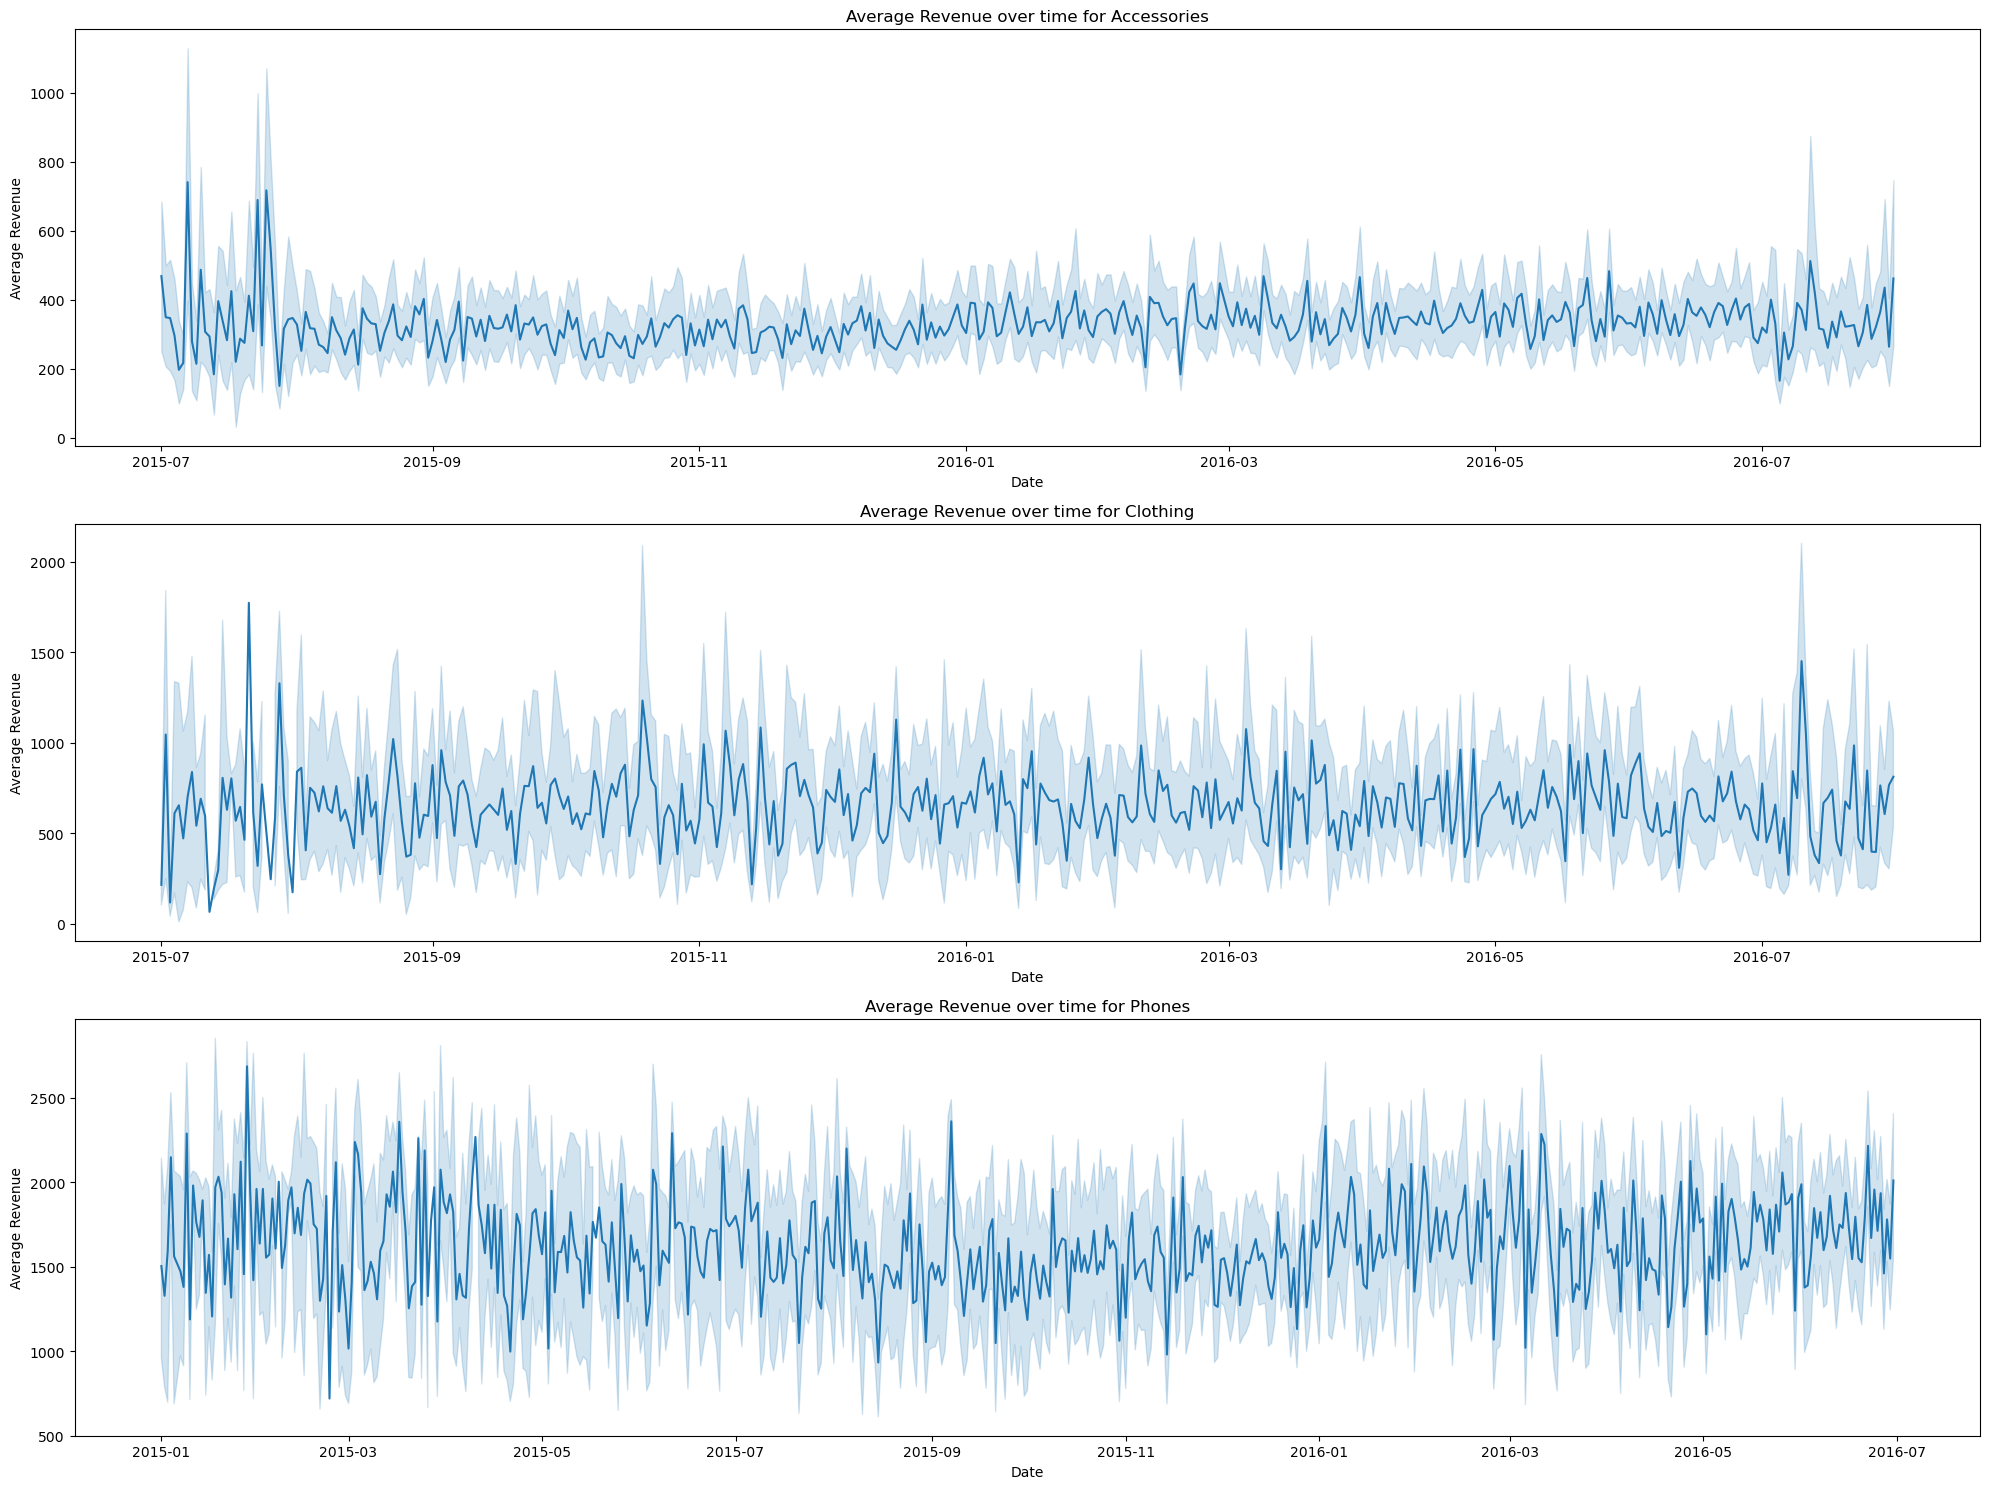

In [88]:
fig,ax=plt.subplots(nrows=3,ncols=1,figsize=(20,15))

sns.lineplot(x='Date',y='Revenue',data=accessories,ax=ax[0])
ax[0].set_title("Average Revenue over time for Accessories")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Average Revenue")

sns.lineplot(x='Date',y='Revenue',data=clothing,ax=ax[1])
ax[1].set_title("Average Revenue over time for Clothing")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Average Revenue")

sns.lineplot(x='Date',y='Revenue',data=phones,ax=ax[2])
ax[2].set_title("Average Revenue over time for Phones")
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Average Revenue")

plt.tight_layout()
plt.show()

#### My Observation
In 2015, sales performance varied across product categories. Accessories recorded their peak sales around July, clothing reached its highest sales in August, while phones experienced their sales peak around February. This indicates differing seasonal demand patterns across product categories. 

In [117]:
df_filtered = df[(df['Product_Category'] == 'Accessories') & (df['Date'].dt.month == 7) & (df['Date'].dt.year == 2015)]
df_filtered

Date Customer Sales Person  Customer_Age Customer_Gender    State  \
47    2015-07-22     High        Segun            29               F    Lagos   
54    2015-07-27     High        Segun            18               F  Adamawa   
69    2015-07-26     High        Segun            19               F    Lagos   
88    2015-07-31     High        Segun            40               M    Lagos   
92    2015-07-16     High        Segun            22               F     Abia   
...          ...      ...          ...           ...             ...      ...   
34108 2015-07-20      Low     Chinazam            49               F    Lagos   
34636 2015-07-04   Medium        Kenny            29               F  Anambra   
34637 2015-07-04   Medium        Kenny            29               F  Anambra   
34638 2015-07-04   Medium        Kenny            29               F  Anambra   
34791 2015-07-10   Medium        Kenny            35               F  Anambra   

      Product_Category    Sub_Category Payment Option  Quantity  ...  \
47         Accessories  Laptop Charger         Online       1.0  ...   
54         Accessories           Mouse         Online       2.0  ...   
69         Accessories     Wrist Watch         Online       2.0  ...   
88         Accessories           Mouse         Online       1.0  ...   
92         Accessories       Ear Piece         Online       1.0  ...   
...                ...             ...            ...       ...  ...   
34108      Accessories        Keyboard         Online       1.0  ...   
34636      Accessories        Keyboard         Online       2.0  ...   
34637      Accessories        Keyboard         Online       1.0  ...   
34638      Accessories        Keyboard         Online       3.0  ...   
34791      Accessories     Wrist Watch         Online       1.0  ...   

       Unit_Price  year  month  monthname quarter           age_group  \
47         677.00  2015      7       July       3        28-38 Youths   
54         813.00  2015      7       July       3  17-27 Young Adults   
69         139.50  2015      7       July       3  17-27 Young Adults   
88         752.00  2015      7       July       3        39-49 Adults   
92          67.00  2015      7       July       3  17-27 Young Adults   
...           ...   ...    ...        ...     ...                 ...   
34108      125.00  2015      7       July       3        39-49 Adults   
34636      431.50  2015      7       July       3        28-38 Youths   
34637      109.00  2015      7       July       3        28-38 Youths   
34638       15.33  2015      7       July       3        28-38 Youths   
34791     1513.00  2015      7       July       3        28-38 Youths   

          Cost  Revenue  Profit  Profit_Label  
47      636.00   677.00    41.0        Profit  
54     1595.00  1626.00    31.0        Profit  
69      245.00   279.00    34.0        Profit  
88      715.00   752.00    37.0        Profit  
92       65.00    67.00     2.0        Profit  
...        ...      ...     ...           ...  
34108   125.00   125.00     0.0        Profit  
34636   645.00   863.00   218.0        Profit  
34637    80.00   109.00    29.0        Profit  
34638    33.99    45.99    12.0        Profit  
34791  1050.00  1513.00   463.0        Profit  

[457 rows x 21 columns]

Accessories started selling in the month of July 2015

In [136]:
df_filtered2=df[(df['Product_Category']=='Clothing') & (df['Date'].dt.month==7) & (df['Date'].dt.year==2015)  ]
df_filtered2

Date Customer Sales Person  Customer_Age Customer_Gender    State  \
76    2015-07-16     High        Segun            20               F     Abia   
94    2015-07-16     High        Segun            22               F     Abia   
503   2015-07-24     High        Segun            33               F     Abia   
719   2015-07-06     High        Segun            61               F  Bayelsa   
728   2015-07-07     High        Segun            61               M    Abuja   
...          ...      ...          ...           ...             ...      ...   
30598 2015-07-03     High       Derick            31               F    Benue   
30704 2015-07-02     High       Derick            18               F    Benue   
32011 2015-07-07     High       Derick            30               M   Bauchi   
33550 2015-07-16     High     Chinazam            42               F  Adamawa   
34639 2015-07-08   Medium        Kenny            29               M   Bauchi   

      Product_Category Sub_Category Payment Option  Quantity  ...  Unit_Price  \
76            Clothing      Tshirts         Online       1.0  ...      228.00   
94            Clothing      Jerseys         Online       3.0  ...      437.67   
503           Clothing      Tshirts         Online       1.0  ...      231.00   
719           Clothing      Jerseys         Online       1.0  ...      100.00   
728           Clothing      Tshirts         Online       2.0  ...       39.00   
...                ...          ...            ...       ...  ...         ...   
30598         Clothing        Socks           Cash       3.0  ...      110.33   
30704         Clothing      Jerseys           Cash       2.0  ...      920.00   
32011         Clothing      Jerseys           Cash       2.0  ...      192.50   
33550         Clothing      Jerseys         Online       2.0  ...      225.00   
34639         Clothing        Vests         Online       3.0  ...      492.00   

       year  month  monthname quarter           age_group     Cost  Revenue  \
76     2015      7       July       3  17-27 Young Adults   216.00   228.00   
94     2015      7       July       3  17-27 Young Adults  1242.00  1313.01   
503    2015      7       July       3        28-38 Youths   180.00   231.00   
719    2015      7       July       3       61-71 Elderly   108.00   100.00   
728    2015      7       July       3       61-71 Elderly    72.00    78.00   
...     ...    ...        ...     ...                 ...      ...      ...   
30598  2015      7       July       3        28-38 Youths   270.00   330.99   
30704  2015      7       July       3  17-27 Young Adults  1566.00  1840.00   
32011  2015      7       July       3        28-38 Youths   300.00   385.00   
33550  2015      7       July       3        39-49 Adults   378.00   450.00   
34639  2015      7       July       3        28-38 Youths  1269.99  1476.00   

       Profit  Profit_Label  
76      12.00        Profit  
94      71.01        Profit  
503     51.00        Profit  
719     -8.00          Loss  
728      6.00        Profit  
...       ...           ...  
30598   60.99        Profit  
30704  274.00        Profit  
32011   85.00        Profit  
33550   72.00        Profit  
34639  206.01        Profit  

[116 rows x 21 columns]

Clothing also started selling in the month of July,maybe that explains the rapid profits in the month we saw in the month of july when accessories and clothings were introduced

In [163]:
df_filtered2=df[(df['Product_Category']=='Phones') & (df['Date'].dt.month==1) & (df['Date'].dt.year==2015)  ]
df_filtered2

Date Customer Sales Person  Customer_Age Customer_Gender  \
234   2015-01-13     High        Segun            46               M   
235   2015-01-15     High        Segun            46               M   
1269  2015-01-25     High        Segun            24               M   
1366  2015-01-10     High        Segun            27               M   
1693  2015-01-09     High        Segun            24               F   
...          ...      ...          ...           ...             ...   
33994 2015-01-08      Low     Chinazam            44               F   
34640 2015-01-08   Medium        Kenny            29               F   
34669 2015-01-26   Medium        Kenny            33               F   
34674 2015-01-20   Medium        Kenny            31               F   
34675 2015-01-31   Medium        Kenny            31               F   

             State Product_Category Sub_Category Payment Option  Quantity  \
234           Abia           Phones       IPhone         Online       3.0   
235           Abia           Phones       IPhone         Online       2.0   
1269         Lagos           Phones      Samsung         Online       1.0   
1366          Abia           Phones      Samsung         Online       2.0   
1693         Lagos           Phones       IPhone         Online       3.0   
...            ...              ...          ...            ...       ...   
33994          Edo           Phones       IPhone         Online       2.0   
34640  Cross River           Phones       IPhone         Online       2.0   
34669       Ebonyi           Phones       IPhone         Online       1.0   
34674      Bayelsa           Phones       IPhone         Online       2.0   
34675      Bayelsa           Phones       IPhone         Online       1.0   

       ...  Unit_Price  year  month  monthname quarter           age_group  \
234    ...      623.00  2015      1    January       1        39-49 Adults   
235    ...      973.50  2015      1    January       1        39-49 Adults   
1269   ...     2229.00  2015      1    January       1  17-27 Young Adults   
1366   ...      359.50  2015      1    January       1  17-27 Young Adults   
1693   ...      680.67  2015      1    January       1  17-27 Young Adults   
...    ...         ...   ...    ...        ...     ...                 ...   
33994  ...     1300.00  2015      1    January       1        39-49 Adults   
34640  ...      640.00  2015      1    January       1        28-38 Youths   
34669  ...     2558.00  2015      1    January       1        28-38 Youths   
34674  ...      702.50  2015      1    January       1        28-38 Youths   
34675  ...     2202.00  2015      1    January       1        28-38 Youths   

          Cost  Revenue  Profit  Profit_Label  
234    2049.00  1869.00 -180.00          Loss  
235    2071.00  1947.00 -124.00          Loss  
1269   2443.00  2229.00 -214.00          Loss  
1366    783.00   719.00  -64.00          Loss  
1693   2070.99  2042.01  -28.98          Loss  
...        ...      ...     ...           ...  
33994  2049.00  2600.00  551.00        Profit  
34640  2071.00  1280.00 -791.00          Loss  
34669  2071.00  2558.00  487.00        Profit  
34674  2071.00  1405.00 -666.00          Loss  
34675  2049.00  2202.00  153.00        Profit  

[138 rows x 21 columns]

Clothings has been selling since January,meaning it is the one causing the loss we saw in the first 6 months at the beginning of the year

#### Visualizing seasonality across year-month 

In [165]:
df['Year_Month']=df['Date'].dt.to_period('M').astype(str)

C:\Users\muham\AppData\Local\Temp\ipykernel_24928\1762620197.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
C:\Users\muham\AppData\Local\Temp\ipykernel_24928\1762620197.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


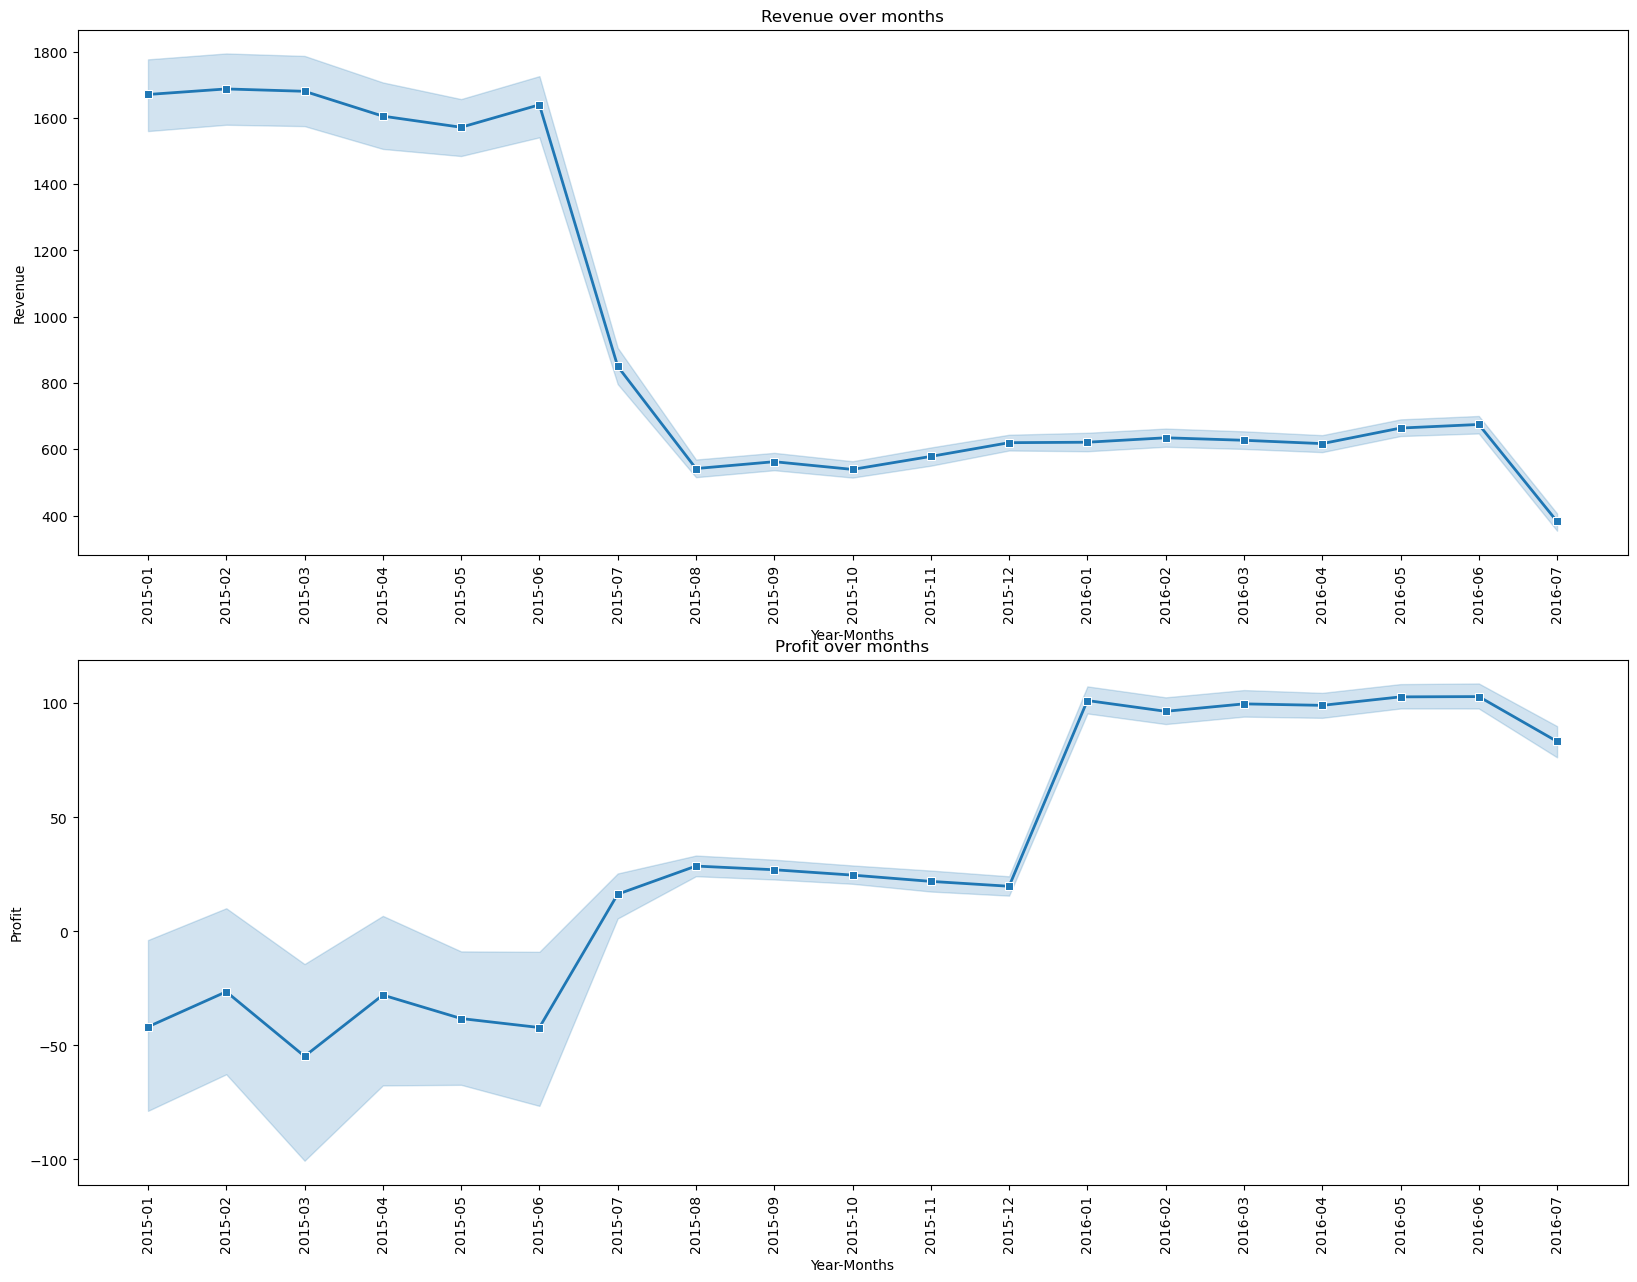

In [187]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(20,15))

df = df.sort_values('Year_Month', key=lambda x: pd.to_datetime(x))

sns.lineplot(x='Year_Month',y='Revenue',data=df,marker='s',linewidth=2,ax=ax[0])
ax[0].set_title("Revenue over months")
ax[0].set_xlabel("Year-Months")
ax[0].set_ylabel("Revenue")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.lineplot(x='Year_Month',y='Profit',data=df,marker='s',linewidth=2,ax=ax[1])
ax[1].set_title("Profit over months")
ax[1].set_xlabel("Year-Months")
ax[1].set_ylabel("Profit")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.tight_layout
plt.show()

> **Observation:**
> Revenue showed a decline in July and remained relatively stable afterward, while profit began to rise steadily from July onward. This pattern aligns with the trend observed in the pivot table above.


#### Average revenue and profit on Monthly basis across all year

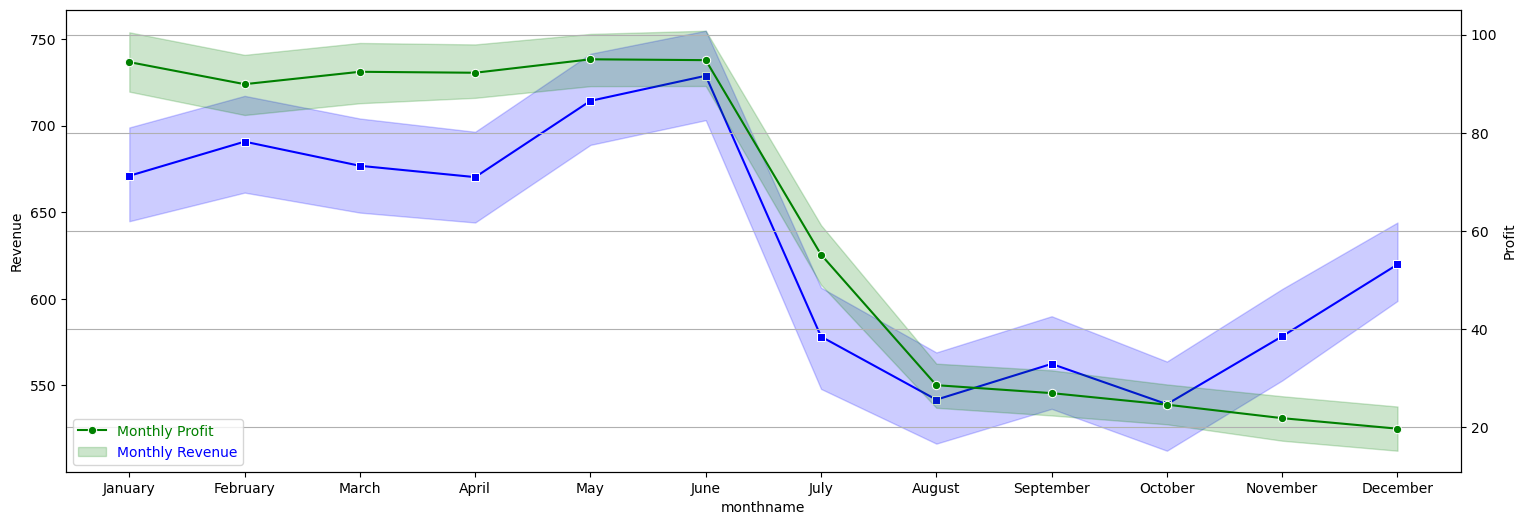

In [202]:
fig,ax=plt.subplots(figsize=(18,6))
sns.lineplot(x=df['monthname'],y="Revenue",data=df,marker='s',color='blue')
ax2=ax.twinx()
sns.lineplot(x=df['monthname'],y="Profit",data=df,marker='o',color='green')

plt.legend(labels=['Monthly Profit','Monthly Revenue'],loc='lower left',labelcolor=['green','blue'])
plt.grid(True)
plt.show()